<a href="https://colab.research.google.com/github/tasmia008/Defect-Software/blob/main/Defect_ML_PC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datapath="/content/drive/MyDrive/Defect/defectPC1.csv"

In [ ]:
df=pd.read_csv(datapath)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc               1109 non-null   float64
 1   v(g)              1109 non-null   float64
 2   ev(g)             1109 non-null   float64
 3   iv(g)             1109 non-null   float64
 4   n                 1109 non-null   float64
 5   v                 1109 non-null   float64
 6   l                 1109 non-null   float64
 7   d                 1109 non-null   float64
 8   i                 1109 non-null   float64
 9   e                 1109 non-null   float64
 10  b                 1109 non-null   float64
 11  t                 1109 non-null   float64
 12  lOCode            1109 non-null   int64  
 13  lOComment         1109 non-null   int64  
 14  lOBlank           1109 non-null   int64  
 15  lOCodeAndComment  1109 non-null   int64  
 16  uniq_Op           1109 non-null   float64


In [ ]:
df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,80,44,11,31,29.0,66.0,192.0,126.0,17.0,True
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,97,41,12,24,28.0,75.0,229.0,152.0,38.0,True
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,457,71,48,49,64.0,397.0,1397.0,942.0,178.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,6.0,4.0,4.0,1.0,26.0,96.21,0.08,13.33,7.22,1282.82,...,6,0,0,2,10.0,3.0,18.0,8.0,7.0,False
1105,10.0,5.0,5.0,1.0,43.0,182.66,0.05,21.00,8.70,3835.88,...,10,0,0,1,14.0,5.0,28.0,15.0,9.0,False
1106,5.0,3.0,3.0,1.0,17.0,62.91,0.21,4.80,13.11,301.96,...,5,0,0,0,8.0,5.0,11.0,6.0,5.0,False
1107,18.0,8.0,5.0,5.0,111.0,613.12,0.04,22.92,26.75,14050.56,...,18,0,0,1,22.0,24.0,61.0,50.0,15.0,False


In [ ]:
df.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'lOCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

In [ ]:
map1 = {'False': 0, 'True': 1}
df['defects'] = df['defects'].replace(map1)

In [ ]:
df = df.replace('?', 0)

In [ ]:
#df = df.astype('float64')

In [ ]:
df['defects'] = df['defects'].astype('int64')

In [ ]:
#df = pd.get_dummies(df, columns=['Gender'])

In [ ]:
desc = pd.DataFrame(index = df.columns)
desc['count'] = df.count()
desc['nunique'] = df.nunique()
desc['%unique'] = desc['nunique'] / len(df) * 100
desc['null'] = df.isnull().sum()
desc['type'] = df.dtypes
desc = pd.concat([desc, df.describe().T], axis = 1)
desc

,count,nunique,%unique,null,type,count,mean,std,min,25%,50%,75%,max
loc,1109,111,10.009017,0,float64,1109.0,23.376105,35.284017,0.0,7.00,13.00,26.00,602.00
v(g),1109,48,4.328224,0,float64,1109.0,5.510730,8.958976,1.0,1.00,3.00,6.00,136.00
ev(g),1109,27,2.434626,0,float64,1109.0,2.766817,5.567704,1.0,1.00,1.00,3.00,123.00
iv(g),1109,31,2.795311,0,float64,1109.0,3.321371,6.401998,1.0,1.00,2.00,3.00,123.00
n,1109,312,28.133454,0,float64,1109.0,117.393417,197.336888,1.0,25.00,58.00,126.00,2785.00
v,1109,756,68.169522,0,float64,1109.0,699.711217,1509.545684,0.0,97.67,275.10,674.04,25942.69
l,1109,45,4.057710,0,float64,1109.0,0.129414,0.146952,0.0,0.05,0.08,0.16,2.00
d,1109,613,55.275023,0,float64,1109.0,15.396267,16.337508,0.0,5.71,11.61,20.50,270.66
i,1109,823,74.211001,0,float64,1109.0,32.904472,35.387685,0.0,14.04,23.57,41.15,598.33
e,1109,890,80.252480,0,float64,1109.0,28822.882381,170643.603328,0.0,558.13,3189.17,12381.56,4279633.01


In [ ]:
df.head(10)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,80,44,11,31,29.0,66.0,192.0,126.0,17.0,1
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,97,41,12,24,28.0,75.0,229.0,152.0,38.0,1
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,457,71,48,49,64.0,397.0,1397.0,942.0,178.0,1
5,107.0,25.0,7.0,14.0,619.0,4282.78,0.02,52.91,80.95,226588.75,...,103,32,4,39,35.0,86.0,359.0,260.0,40.0,1
6,74.0,11.0,1.0,8.0,294.0,1917.93,0.03,28.77,66.66,55178.46,...,60,71,14,49,29.0,63.0,169.0,125.0,21.0,1
7,602.0,136.0,123.0,123.0,2785.0,25942.69,0.01,105.26,246.47,2730637.23,...,600,40,2,225,99.0,538.0,1641.0,1144.0,236.0,1
8,29.0,2.0,1.0,2.0,140.0,718.10,0.10,9.93,72.35,7127.80,...,28,3,1,8,8.0,27.0,73.0,67.0,3.0,1
9,36.0,3.0,1.0,1.0,254.0,1447.91,0.04,23.72,61.05,34338.99,...,34,2,2,10,15.0,37.0,137.0,117.0,5.0,1


In [ ]:
df.isna().values.any()

False

In [ ]:
#df = df.drop('SHA', axis=1)

In [ ]:
#df = df.drop('l', axis=1)
#df = df.drop('locCodeAndComment', axis=1)
#df = df.drop([0, 1])
#df = df.reset_index(drop=True)

In [ ]:
# Check for negative values in each column
columns_with_negative_values = df.columns[df.lt(0).any()]

# Display the columns with negative values
print("Columns with negative values:", columns_with_negative_values)

Columns with negative values: Index([], dtype='object')


In [ ]:
df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,80,44,11,31,29.0,66.0,192.0,126.0,17.0,1
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,97,41,12,24,28.0,75.0,229.0,152.0,38.0,1
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,457,71,48,49,64.0,397.0,1397.0,942.0,178.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,6.0,4.0,4.0,1.0,26.0,96.21,0.08,13.33,7.22,1282.82,...,6,0,0,2,10.0,3.0,18.0,8.0,7.0,0
1105,10.0,5.0,5.0,1.0,43.0,182.66,0.05,21.00,8.70,3835.88,...,10,0,0,1,14.0,5.0,28.0,15.0,9.0,0
1106,5.0,3.0,3.0,1.0,17.0,62.91,0.21,4.80,13.11,301.96,...,5,0,0,0,8.0,5.0,11.0,6.0,5.0,0
1107,18.0,8.0,5.0,5.0,111.0,613.12,0.04,22.92,26.75,14050.56,...,18,0,0,1,22.0,24.0,61.0,50.0,15.0,0


In [ ]:
df.shape

(1109, 22)

In [ ]:
df['defects'].value_counts()

,count
defects,
0,1032
1,77


<ipython-input-87-4b3f94243e14>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='defects',data=df,palette=["#FF0000","#0000FF"])


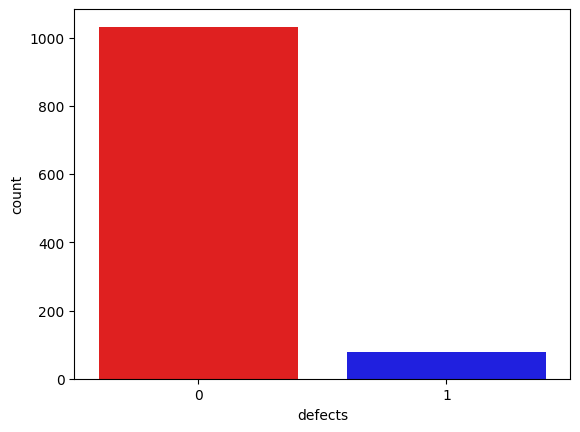

In [ ]:
sns.countplot(x='defects',data=df,palette=["#FF0000","#0000FF"])
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming you have your DataFrame df with 'defects' as the target column
#X = df.drop('defects', axis=1)
#y = df['defects']

# Apply SMOTE
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with resampled data
#df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='defects')], axis=1)

# Update the original DataFrame
#df = df_resampled

In [ ]:
from imblearn.over_sampling import ADASYN
import pandas as pd

X = df.drop('defects', axis=1)
y = df['defects']

adasyn = ADASYN(sampling_strategy='all', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='defects')], axis=1)
df = df_resampled.copy()

<ipython-input-90-4b3f94243e14>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='defects',data=df,palette=["#FF0000","#0000FF"])


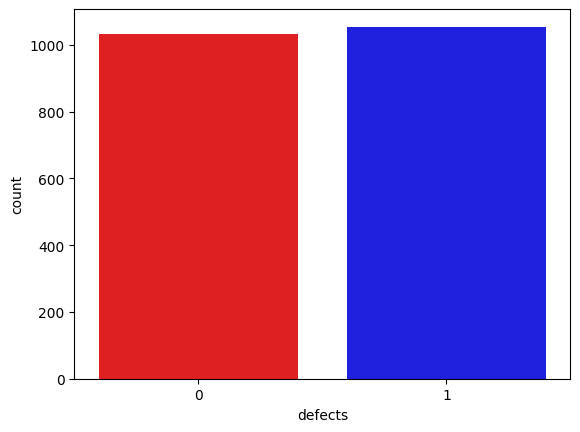

In [ ]:
sns.countplot(x='defects',data=df,palette=["#FF0000","#0000FF"])
plt.show()

In [ ]:
df['defects'].value_counts()

,count
defects,
1,1054
0,1032


In [ ]:
df.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'lOCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
X = df.drop('defects', axis=1)
y = df['defects']
k_best = 20
selector = SelectKBest(score_func=f_classif, k=k_best)
X_new = selector.fit_transform(X, y)
selected_feature_names = X.columns[selector.get_support()]
df_selected = pd.concat([df[selected_feature_names], df['defects']], axis=1)
#df_selected =df

In [ ]:
df_selected.columns

Index(['loc', 'v(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'lOCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

In [ ]:
prediction_var = ['loc', 'v(g)', 'iv(g)', 'n', 'v',  'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'lOCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']
#df_selected=df

In [ ]:
#df_selected=df

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_selected, test_size = 0.2)# in this our main data is splitted into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

# we can check their dimension
print(train.shape)
print(test.shape)

(1668, 21)
(418, 21)


In [ ]:
train_X = train[prediction_var]# taking the training data input
train_y=train['defects']# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test['defects']   #output value of test dat

In [ ]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(1668, 19)
(1668,)
(418, 19)
(418,)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc               2086 non-null   float64
 1   v(g)              2086 non-null   float64
 2   ev(g)             2086 non-null   float64
 3   iv(g)             2086 non-null   float64
 4   n                 2086 non-null   float64
 5   v                 2086 non-null   float64
 6   l                 2086 non-null   float64
 7   d                 2086 non-null   float64
 8   i                 2086 non-null   float64
 9   e                 2086 non-null   float64
 10  b                 2086 non-null   float64
 11  t                 2086 non-null   float64
 12  lOCode            2086 non-null   int64  
 13  lOComment         2086 non-null   int64  
 14  lOBlank           2086 non-null   int64  
 15  lOCodeAndComment  2086 non-null   int64  
 16  uniq_Op           2086 non-null   float64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import RidgeClassifier, LassoCV, ElasticNetCV, PassiveAggressiveClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, log_loss, cohen_kappa_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#!pip install xgboost

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.fit_transform(test_X)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier, PassiveAggressiveClassifier

def models(train_X, train_y):
    # Logistic Regression 0
    log_params = {'C': 0.1}
    log = LogisticRegression(**log_params, random_state=30)
    log.fit(train_X, train_y)

    # Random Forest 1
    forest_params = {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 30, 'criterion': 'gini'}
    forest = RandomForestClassifier(**forest_params, random_state=25)
    forest.fit(train_X, train_y)

    # Decision tree 2
    tree_params = {'criterion': 'gini', 'max_depth': 10}
    tree = DecisionTreeClassifier(**tree_params, random_state=30)
    tree.fit(train_X, train_y)

    # Gradient Boosting 3
    gb_params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
    gb_clf = GradientBoostingClassifier(**gb_params, random_state=35)
    gb_clf.fit(train_X, train_y)

    # Support Vector Machines 4
    svm_params = {'C': 10, 'kernel': 'rbf'}
    svm = SVC(**svm_params, probability=True, random_state=25)
    svm.fit(train_X, train_y)

    # k-Nearest Neighbors 5
    knn_params = {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_jobs': 1, 'p': 2}
    classifier = KNeighborsClassifier(**knn_params)
    classifier.fit(train_X, train_y)

    # Adaboost Classifier 6
    ada_params = {'learning_rate': 0.2, 'n_estimators': 150, 'base_estimator': DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=30)}
    clf = AdaBoostClassifier(**ada_params, random_state=30)
    clf.fit(train_X, train_y)

    # Gaussian 7
    gnb_params = {'priors': None, 'var_smoothing': 1e-09}
    gause_clf = GaussianNB(**gnb_params)
    gause_clf.fit(train_X, train_y)

    # Quadratic Discriminant Analysis 8
    qda_params = {'reg_param': 0.2}
    qda = QuadraticDiscriminantAnalysis(**qda_params)
    qda.fit(train_X, train_y)

    # Ridge Classifier 9
    ridge_params = {'alpha': 1}
    ridge = RidgeClassifier(**ridge_params, random_state=42)
    ridge.fit(train_X, train_y)

    # Passive Aggressive Classifier 10
    pa_params = {'C': 0.01, 'max_iter': 1000}
    passive_aggressive = PassiveAggressiveClassifier(**pa_params, random_state=42)
    passive_aggressive.fit(train_X, train_y)

    print('[0]Logistic Regression Training Accuracy:', log.score(train_X, train_y))
    print('[1]Random Forest Training Accuracy:', forest.score(train_X, train_y))
    print('[2]Decision tree Training Accuracy:', tree.score(train_X, train_y))
    print('[3]Gradient Boosting Training Accuracy:', gb_clf.score(train_X, train_y))
    print('[4]Support Vector Machines Training Accuracy:', svm.score(train_X, train_y))
    print('[5]k-Nearest Neighbors Training Accuracy:', classifier.score(train_X, train_y))
    print('[6]Adaboost Classifier Training Accuracy:', clf.score(train_X, train_y))
    print('[7]Gaussian Training Accuracy:', gause_clf.score(train_X, train_y))
    print('[8]Quadratic Discriminant Analysis Training Accuracy:', qda.score(train_X, train_y))
    print('[9]Ridge Classifier Training Accuracy:', ridge.score(train_X, train_y))
    print('[10]Passive Aggressive Classifier Training Accuracy:', passive_aggressive.score(train_X, train_y))

    return log, forest, tree, gb_clf, svm, classifier, clf, gause_clf, qda, ridge, passive_aggressive

In [ ]:
model = models(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[0]Logistic Regression Training Accuracy: 0.7835731414868106
[1]Random Forest Training Accuracy: 0.9958033573141487
[2]Decision tree Training Accuracy: 0.9718225419664268
[3]Gradient Boosting Training Accuracy: 0.9976019184652278
[4]Support Vector Machines Training Accuracy: 0.8752997601918465
[5]k-Nearest Neighbors Training Accuracy: 0.9976019184652278
[6]Adaboost Classifier Training Accuracy: 0.8627098321342925
[7]Gaussian Training Accuracy: 0.6372901678657075
[8]Quadratic Discriminant Analysis Training Accuracy: 0.6486810551558753
[9]Ridge Classifier Training Accuracy: 0.7913669064748201
[10]Passive Aggressive Classifier Training Accuracy: 0.8201438848920863


Evaluation metrics for Logistic Regression :
Training time: 0.0107 seconds
Testing time: 0.0003 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       206
           1       0.82      0.75      0.78       212

    accuracy                           0.79       418
   macro avg       0.79      0.79      0.79       418
weighted avg       0.79      0.79      0.79       418

Testing accuracy: 78.94736842105263
Precision: 0.8349514563106796
Specificity: 0.8229166666666666
F1 score: 0.7907815864517255
Sensitivity/Recall: 0.7610619469026548
False positive rate: 0.17708333333333334
False negative: 0.23893805309734514
Negative Predictive Value: 0.7452830188679245
False Discovery Rate: 0.1650485436893204
Mean Absolute Error: 0.21052631578947367
R Squared Error: 0.15772119435794096
Root Mean Squared Error: 0.45883146774112354
Log Loss: 7.588137555603612
Cohen Kappa Score: 0.5794383975121193




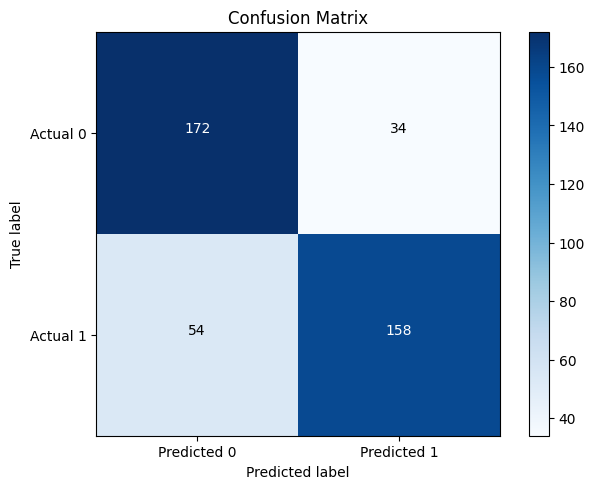

Evaluation metrics for Random Forest :
Training time: 0.1718 seconds
Testing time: 0.0041 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       206
           1       0.90      0.93      0.91       212

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.91      0.91      0.91       418

Testing accuracy: 90.9090909090909
Precision: 0.8883495145631068
Specificity: 0.8954545454545455
F1 score: 0.9096207705699795
Sensitivity/Recall: 0.9242424242424242
False positive rate: 0.10454545454545454
False negative: 0.07575757575757576
Negative Predictive Value: 0.9292452830188679
False Discovery Rate: 0.11165048543689321
Mean Absolute Error: 0.09090909090909091
R Squared Error: 0.6362886975636564
Root Mean Squared Error: 0.30151134457776363
Log Loss: 3.276695762647014
Cohen Kappa Score: 0.8180443548387097




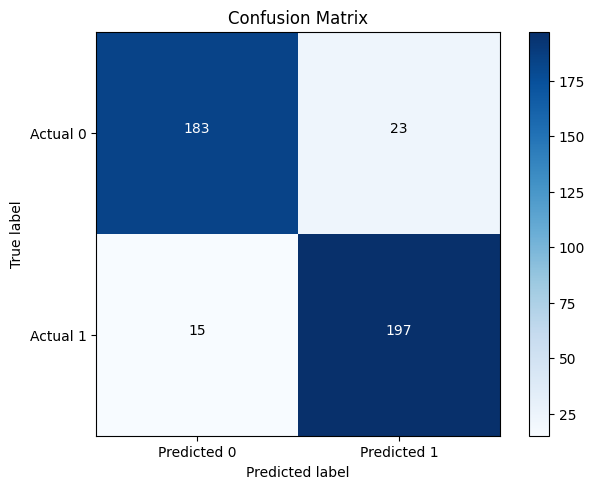

Evaluation metrics for Decision Tree :
Training time: 0.0246 seconds
Testing time: 0.0005 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       206
           1       0.83      0.95      0.88       212

    accuracy                           0.87       418
   macro avg       0.88      0.87      0.87       418
weighted avg       0.88      0.87      0.87       418

Testing accuracy: 87.32057416267942
Precision: 0.7961165048543689
Specificity: 0.8271604938271605
F1 score: 0.8787236594825864
Sensitivity/Recall: 0.9371428571428572
False positive rate: 0.1728395061728395
False negative: 0.06285714285714286
Negative Predictive Value: 0.9481132075471698
False Discovery Rate: 0.20388349514563106
Mean Absolute Error: 0.12679425837320574
R Squared Error: 0.49271844660194175
Root Mean Squared Error: 0.35608181415681106
Log Loss: 4.570128300533993
Cohen Kappa Score: 0.7458179398334059




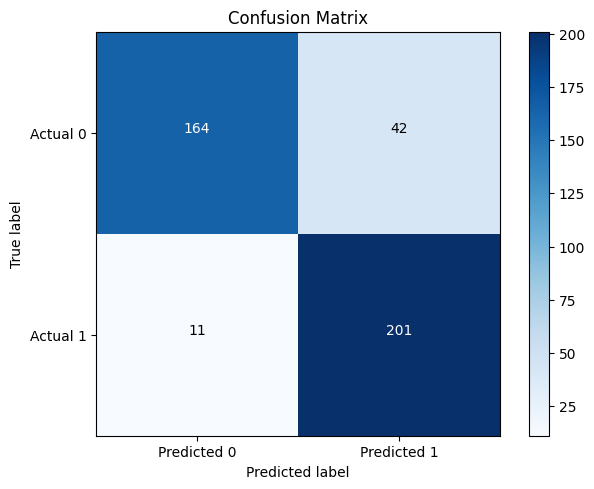

Evaluation metrics for Gradient Boosting :
Training time: 2.7806 seconds
Testing time: 0.0039 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       206
           1       0.88      0.98      0.93       212

    accuracy                           0.92       418
   macro avg       0.93      0.92      0.92       418
weighted avg       0.93      0.92      0.92       418

Testing accuracy: 92.34449760765551
Precision: 0.8640776699029126
Specificity: 0.8813559322033898
F1 score: 0.9271761995392167
Sensitivity/Recall: 0.978021978021978
False positive rate: 0.11864406779661017
False negative: 0.02197802197802198
Negative Predictive Value: 0.9811320754716981
False Discovery Rate: 0.13592233009708737
Mean Absolute Error: 0.07655502392344497
R Squared Error: 0.6937167979483422
Root Mean Squared Error: 0.27668578554642986
Log Loss: 2.7593227474922224
Cohen Kappa Score: 0.8466055045871559




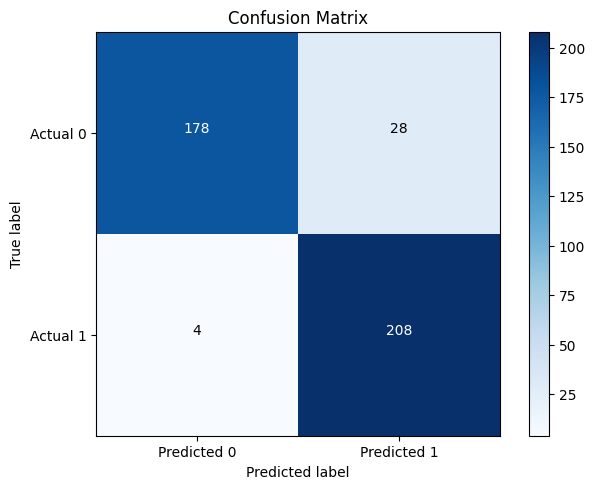

Evaluation metrics for SVM :
Training time: 0.3290 seconds
Testing time: 0.0167 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       206
           1       0.86      0.88      0.87       212

    accuracy                           0.87       418
   macro avg       0.87      0.87      0.87       418
weighted avg       0.87      0.87      0.87       418

Testing accuracy: 86.60287081339713
Precision: 0.8495145631067961
Specificity: 0.8577981651376146
F1 score: 0.8663136995367307
Sensitivity/Recall: 0.875
False positive rate: 0.14220183486238533
False negative: 0.125
Negative Predictive Value: 0.8820754716981132
False Discovery Rate: 0.15048543689320387
Mean Absolute Error: 0.1339712918660287
R Squared Error: 0.4640043964095988
Root Mean Squared Error: 0.36602088993120147
Log Loss: 4.828814808111389
Cohen Kappa Score: 0.7318916937737665




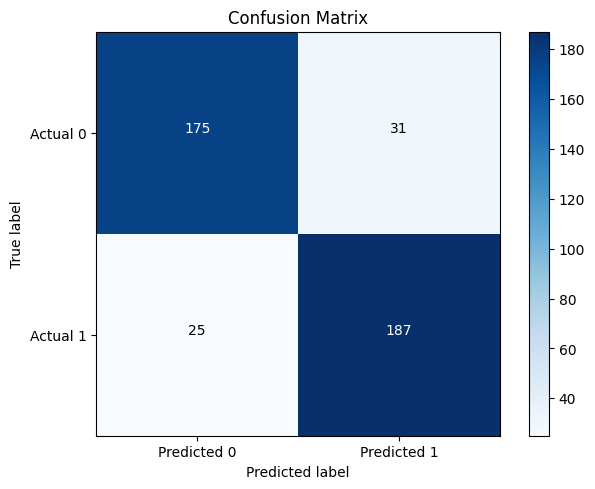

Evaluation metrics for k-Nearest Neighbors :
Training time: 0.0013 seconds
Testing time: 0.0089 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       206
           1       0.86      0.98      0.91       212

    accuracy                           0.91       418
   macro avg       0.92      0.91      0.91       418
weighted avg       0.92      0.91      0.91       418

Testing accuracy: 90.66985645933015
Precision: 0.8300970873786407
Specificity: 0.8559670781893004
F1 score: 0.9125498697933371
Sensitivity/Recall: 0.9771428571428571
False positive rate: 0.1440329218106996
False negative: 0.022857142857142857
Negative Predictive Value: 0.9811320754716981
False Discovery Rate: 0.16990291262135923
Mean Absolute Error: 0.09330143540669857
R Squared Error: 0.626717347499542
Root Mean Squared Error: 0.3054528366322673
Log Loss: 3.362924598506146
Cohen Kappa Score: 0.8129603708208082




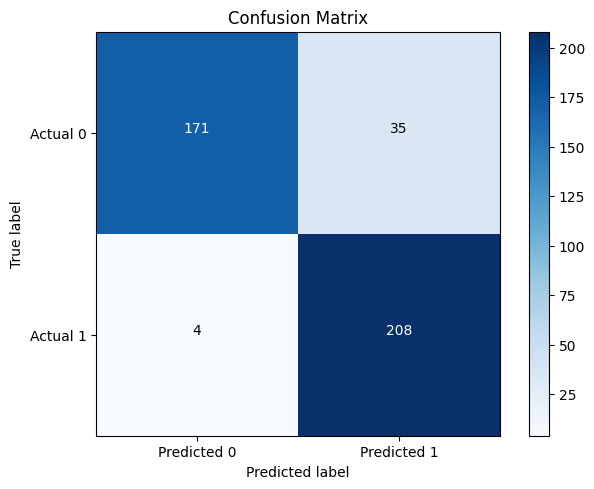

Evaluation metrics for Adaboost Classifier :


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training time: 0.7779 seconds
Testing time: 0.0460 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       206
           1       0.78      0.89      0.83       212

    accuracy                           0.82       418
   macro avg       0.83      0.82      0.82       418
weighted avg       0.83      0.82      0.82       418

Testing accuracy: 82.05741626794259
Precision: 0.7475728155339806
Specificity: 0.7842323651452282
F1 score: 0.8249181628806664
Sensitivity/Recall: 0.8700564971751412
False positive rate: 0.2157676348547718
False negative: 0.12994350282485875
Negative Predictive Value: 0.8915094339622641
False Discovery Rate: 0.2524271844660194
Mean Absolute Error: 0.17942583732057416
R Squared Error: 0.28214874519142696
Root Mean Squared Error: 0.42358687104367876
Log Loss: 6.467162689434896
Cohen Kappa Score: 0.6403579213032007




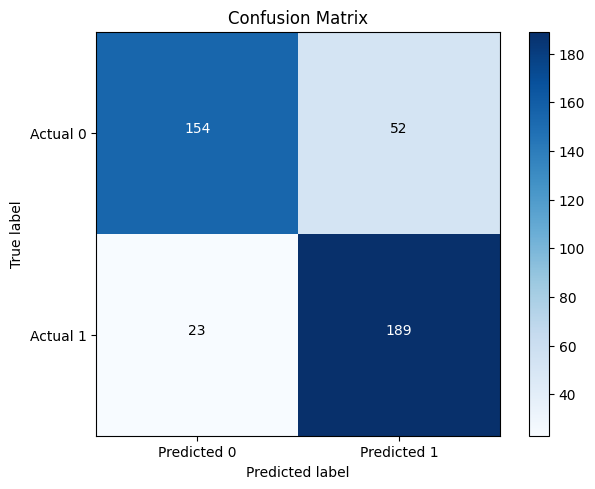

Evaluation metrics for Gaussian :
Training time: 0.0023 seconds
Testing time: 0.0005 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.59      0.92      0.71       206
           1       0.82      0.37      0.51       212

    accuracy                           0.64       418
   macro avg       0.70      0.64      0.61       418
weighted avg       0.70      0.64      0.61       418

Testing accuracy: 63.8755980861244
Precision: 0.9174757281553398
Specificity: 0.8210526315789474
F1 score: 0.6833066814989919
Sensitivity/Recall: 0.5851393188854489
False positive rate: 0.17894736842105263
False negative: 0.4148606811145511
Negative Predictive Value: 0.36792452830188677
False Discovery Rate: 0.0825242718446602
Mean Absolute Error: 0.361244019138756
R Squared Error: -0.4452738596812602
Root Mean Squared Error: 0.6010357885673331
Log Loss: 13.020554214728921
Cohen Kappa Score: 0.2831247302546396




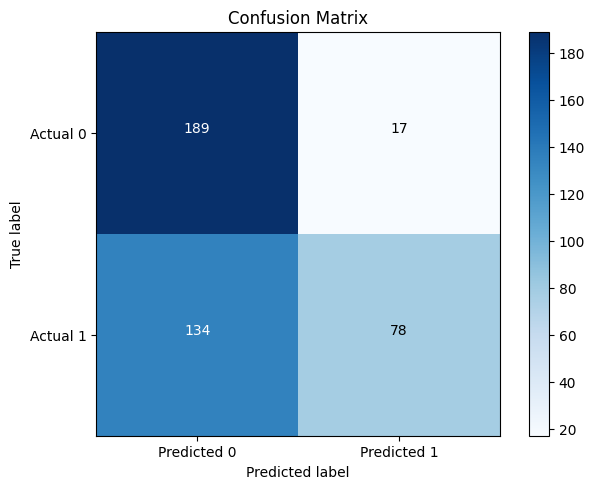

Evaluation metrics for Quadratic Discriminant Analysis :
Training time: 0.0146 seconds
Testing time: 0.0005 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.60      0.95      0.73       206
           1       0.88      0.38      0.53       212

    accuracy                           0.66       418
   macro avg       0.74      0.66      0.63       418
weighted avg       0.74      0.66      0.63       418

Testing accuracy: 66.02870813397129
Precision: 0.9466019417475728
Specificity: 0.8804347826086957
F1 score: 0.7123528615884184
Sensitivity/Recall: 0.598159509202454
False positive rate: 0.11956521739130435
False negative: 0.401840490797546
Negative Predictive Value: 0.38207547169811323
False Discovery Rate: 0.05339805825242718
Mean Absolute Error: 0.3397129186602871
R Squared Error: -0.35913170910423164
Root Mean Squared Error: 0.5828489672807932
Log Loss: 12.244494691996737
Cohen Kappa Score: 0.3259901889534884




/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


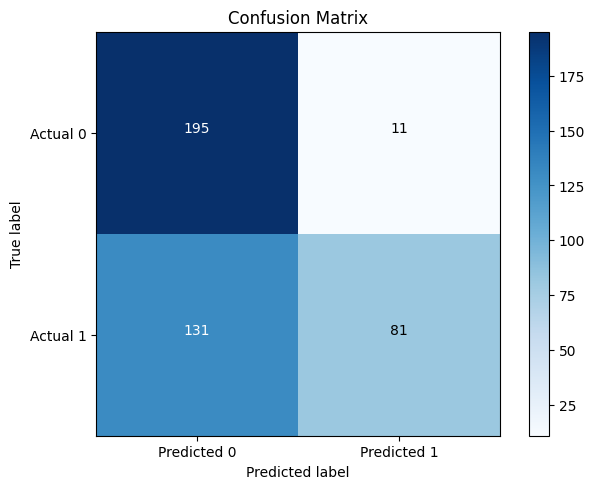

Evaluation metrics for Ridge Classifier :
Training time: 0.0062 seconds
Testing time: 0.0003 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       206
           1       0.84      0.75      0.79       212

    accuracy                           0.80       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.81      0.80      0.80       418

Testing accuracy: 80.14354066985646
Precision: 0.8543689320388349
Specificity: 0.8412698412698413
F1 score: 0.8032723358449946
Sensitivity/Recall: 0.7685589519650655
False positive rate: 0.15873015873015872
False negative: 0.2314410480349345
Negative Predictive Value: 0.75
False Discovery Rate: 0.14563106796116504
Mean Absolute Error: 0.19856459330143542
R Squared Error: 0.20557794467851254
Root Mean Squared Error: 0.4456058721577123
Log Loss: 7.156993376307952
Cohen Kappa Score: 0.6034155597722961




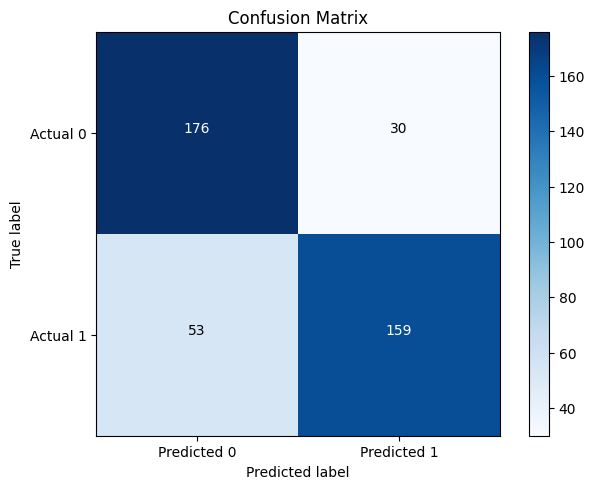

Evaluation metrics for Passive Aggressive Classifier :
Training time: 0.0088 seconds
Testing time: 0.0003 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       206
           1       0.81      0.82      0.81       212

    accuracy                           0.81       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.81      0.81      0.81       418

Testing accuracy: 80.86124401913875
Precision: 0.7961165048543689
Specificity: 0.8055555555555556
F1 score: 0.8087060023805475
Sensitivity/Recall: 0.8118811881188119
False positive rate: 0.19444444444444445
False negative: 0.18811881188118812
Negative Predictive Value: 0.8207547169811321
False Discovery Rate: 0.20388349514563106
Mean Absolute Error: 0.19138755980861244
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.4374786392598071
Log Loss: 6.898306868730555
Cohen Kappa Score: 0.6170407695831425




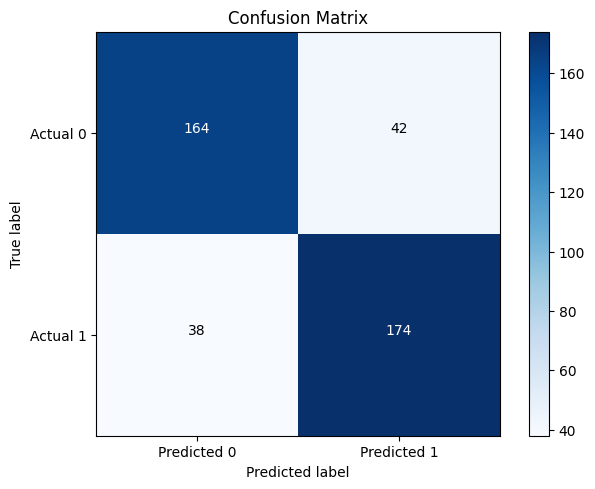

Average Training Time: 0.3753 seconds
Average Testing Time: 0.0075 seconds


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,r2_score
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
import time
import numpy as np
import itertools

def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Actual 0', 'Actual 1']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

algorithm_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'SVM',
                    'k-Nearest Neighbors', 'Adaboost Classifier', 'Gaussian', 'Quadratic Discriminant Analysis',
                    'Ridge Classifier', 'Passive Aggressive Classifier']

# Lists to store training and testing times
training_times = []
testing_times = []

for i, algorithm in enumerate(algorithm_names):
    print('Evaluation metrics for', algorithm, ':')

    # Measure training time
    start_train_time = time.time()
    model[i].fit(train_X, train_y)
    end_train_time = time.time()

    # Calculate training time
    training_time = end_train_time - start_train_time
    training_times.append(training_time)
    print(f'Training time: {training_time:.4f} seconds')

    # Measure testing time
    start_test_time = time.time()
    predictions = model[i].predict(test_X)
    end_test_time = time.time()

    # Calculate testing time
    testing_time = end_test_time - start_test_time
    testing_times.append(testing_time)
    print(f'Testing time: {testing_time:.4f} seconds')

    # Confusion Matrix
    cm = confusion_matrix(test_y, predictions)
    TP, TN, FP, FN = cm[0][0], cm[1][1], cm[0][1], cm[1][0]

    # Classification Report
    result1 = classification_report(test_y, predictions)
    print("Classification report:")
    print(result1)

    # Accuracy and other metrics
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
    precision = TP / (TP + FP)
    specificity = TN / (TN + FP)
    f1_score = 2 * ((TN / (TN + FP)) * (TP / (TP + FN))) / ((TN / (TN + FP)) + (TP / (TP + FN)))
    sensitivity_recall = TP / (TP + FN)
    false_positive_rate = FP / (FP + TN)
    false_negative = FN / (FN + TP)
    negative_predictive_value = TN / (TN + FN)
    false_discovery_rate = FP / (TP + FP)

    print('Testing accuracy:', accuracy)
    print('Precision:', precision)
    print('Specificity:', specificity)
    print('F1 score:', f1_score)
    print('Sensitivity/Recall:', sensitivity_recall)
    print('False positive rate:', false_positive_rate)
    print('False negative:', false_negative)
    print('Negative Predictive Value:', negative_predictive_value)
    print('False Discovery Rate:', false_discovery_rate)

    # Additional Metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))
    print('R Squared Error:', r2_score(test_y, predictions))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))
    print('Log Loss:', metrics.log_loss(test_y, predictions))
    print('Cohen Kappa Score:', cohen_kappa_score(test_y, predictions))

    print()
    print()
    plot_confusion_matrix(cm)
# Print average training and testing times
print(f'Average Training Time: {np.mean(training_times):.4f} seconds')
print(f'Average Testing Time: {np.mean(testing_times):.4f} seconds')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


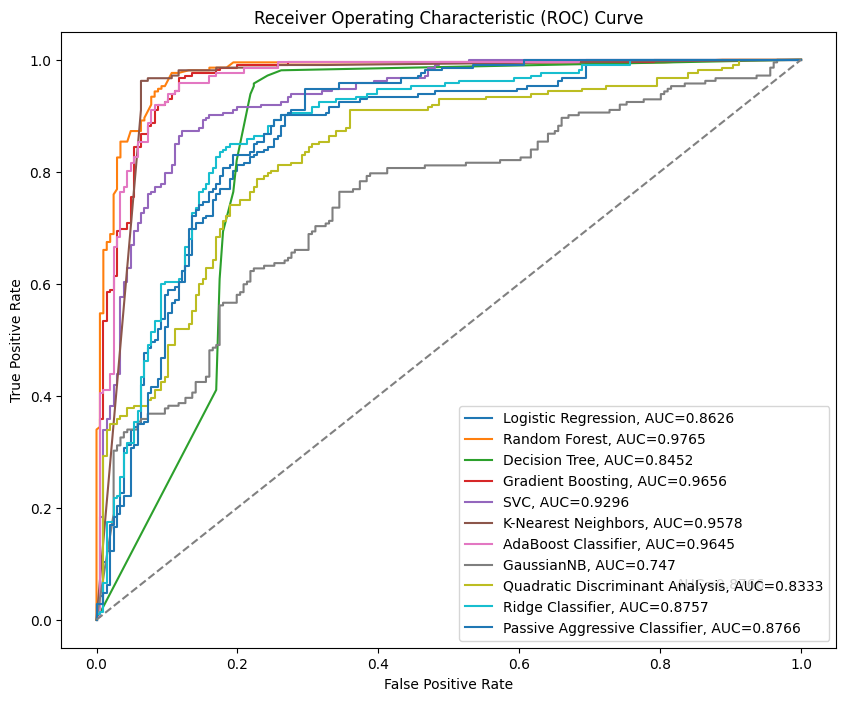

In [ ]:
def plot_roc_curve(model, model_name, train_X, train_y, test_X, test_y):
    if not hasattr(model, "fit"):
        print(f"Model {model_name} does not have 'fit' method.")
        return

    model.fit(train_X, train_y)  # Make sure to fit the model before using it

    if hasattr(model, "decision_function"):
        y_score = model.decision_function(test_X)
    elif hasattr(model, "predict_proba"):
        y_score = model.predict_proba(test_X)[:, 1]
    else:
        raise AttributeError(f"Model {model_name} does not have decision_function or predict_proba method.")

    fpr, tpr, _ = roc_curve(test_y, y_score)
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name}, AUC={round(auc_value, 4)}")

    # Adjust the position of the AUC score text
    plt.text(0.95, 0.05, f"AUC={round(auc_value, 4)}", ha='right', va='bottom', backgroundcolor='white')


models = [
    (LogisticRegression(C=0.1), "Logistic Regression"),
    (RandomForestClassifier(max_depth=15, min_samples_split=2, n_estimators=30), "Random Forest"),
    (DecisionTreeClassifier(criterion='gini', max_depth=10), "Decision Tree"),
    (GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=150), "Gradient Boosting"),
    (SVC(C=10, kernel='rbf', probability=True), "SVC"),
    (KNeighborsClassifier(n_neighbors=5, weights='distance'), "K-Nearest Neighbors"),
    (AdaBoostClassifier(learning_rate=0.2, n_estimators=150, base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4)), "AdaBoost Classifier"),
    (GaussianNB(), "GaussianNB"),
    (QuadraticDiscriminantAnalysis(reg_param=0.2), "Quadratic Discriminant Analysis"),
    (RidgeClassifier(alpha=1), "Ridge Classifier"),
    (PassiveAggressiveClassifier(C=0.01, max_iter=1000), "Passive Aggressive Classifier")
]

# Plot ROC curves
plt.figure(figsize=(10, 8))
for model, name in models:
    plot_roc_curve(model, name, train_X, train_y, test_X, test_y)

# Add diagonal line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


In [ ]:
#BAGGING

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Initialize models with updated parameters
models = [
    (LogisticRegression(C=0.1), "Logistic Regression"),
    (RandomForestClassifier(max_depth=15, min_samples_split=2, n_estimators=30), "Random Forest"),
    (DecisionTreeClassifier(criterion='gini', max_depth=10), "Decision Tree"),
    (GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=150), "Gradient Boosting"),
    (SVC(C=10, kernel='rbf', probability=True), "SVC"),
    (KNeighborsClassifier(n_neighbors=5, weights='distance'), "K-Nearest Neighbors"),
    (AdaBoostClassifier(learning_rate=0.2, n_estimators=150, base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4)), "AdaBoost Classifier"),
    (GaussianNB(), "GaussianNB"),
    (QuadraticDiscriminantAnalysis(reg_param=0.2), "Quadratic Discriminant Analysis"),
    (RidgeClassifier(alpha=1), "Ridge Classifier"),
    (PassiveAggressiveClassifier(C=0.01, max_iter=1000), "Passive Aggressive Classifier")
]

Bagging and Evaluating Metrics for Logistic Regression:
Training time: 0.1353 seconds
Testing time: 0.0067 seconds
Testing accuracy: 78.22966507177034
Precision: 0.8167539267015707
Specificity: 0.8300970873786407
F1 score: 0.7741935483870968
Sensitivity/Recall: 0.7358490566037735
False positive rate: 0.16990291262135923
False negative: 0.2641509433962264
Negative Predictive Value: 0.7533039647577092
False Discovery Rate: 0.18324607329842932
Mean Absolute Error: 0.21770334928229665
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.4665869150354483
Log Loss: 7.846824063181008
Cohen Kappa Score: 0.5651309020235509
Confusion Matrix:
[[171  35]
 [ 56 156]]


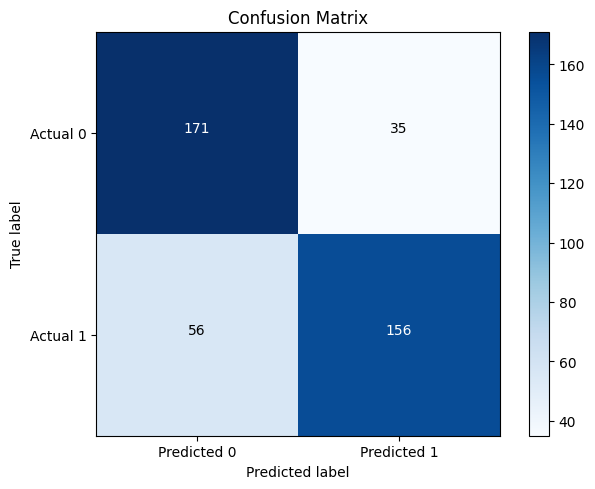



Bagging and Evaluating Metrics for Random Forest:
Training time: 1.1092 seconds
Testing time: 0.0338 seconds
Testing accuracy: 93.30143540669856
Precision: 0.896551724137931
Specificity: 0.883495145631068
F1 score: 0.9369369369369369
Sensitivity/Recall: 0.9811320754716981
False positive rate: 0.11650485436893204
False negative: 0.018867924528301886
Negative Predictive Value: 0.978494623655914
False Discovery Rate: 0.10344827586206896
Mean Absolute Error: 0.06698564593301436
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.2588158533262875
Log Loss: 2.4144074040556944
Cohen Kappa Score: 0.8658167476841236
Confusion Matrix:
[[182  24]
 [  4 208]]


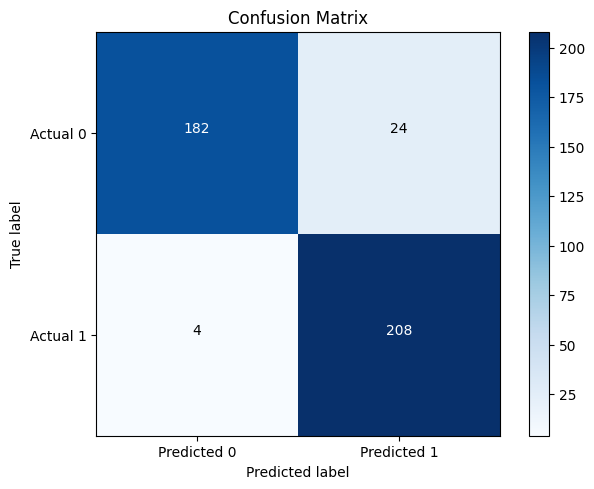



Bagging and Evaluating Metrics for Decision Tree:
Training time: 0.1598 seconds
Testing time: 0.0034 seconds
Testing accuracy: 90.43062200956938
Precision: 0.8524590163934426
Specificity: 0.8252427184466019
F1 score: 0.912280701754386
Sensitivity/Recall: 0.9811320754716981
False positive rate: 0.17475728155339806
False negative: 0.018867924528301886
Negative Predictive Value: 0.9770114942528736
False Discovery Rate: 0.14754098360655737
Mean Absolute Error: 0.09569377990430622
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.309344112444873
Log Loss: 3.4491534343652774
Cohen Kappa Score: 0.8081512759317055
Confusion Matrix:
[[170  36]
 [  4 208]]


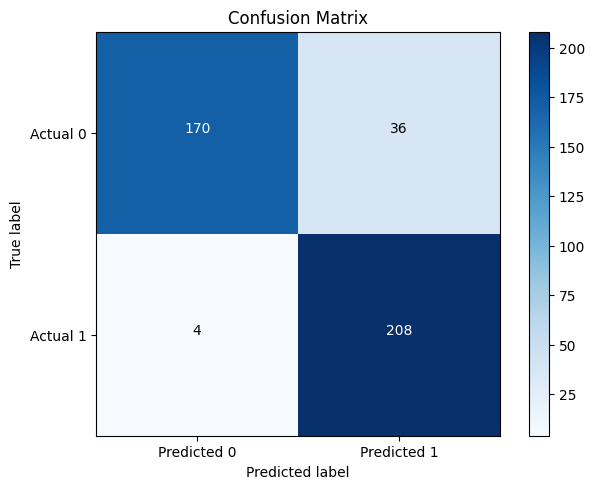



Bagging and Evaluating Metrics for Gradient Boosting:
Training time: 21.4659 seconds
Testing time: 0.0354 seconds
Testing accuracy: 92.10526315789474
Precision: 0.8683127572016461
Specificity: 0.8446601941747572
F1 score: 0.9274725274725275
Sensitivity/Recall: 0.9952830188679245
False positive rate: 0.1553398058252427
False negative: 0.0047169811320754715
Negative Predictive Value: 0.9942857142857143
False Discovery Rate: 0.13168724279835392
Mean Absolute Error: 0.07894736842105263
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.28097574347450816
Log Loss: 2.845551583351354
Cohen Kappa Score: 0.8417356983868377
Confusion Matrix:
[[174  32]
 [  1 211]]


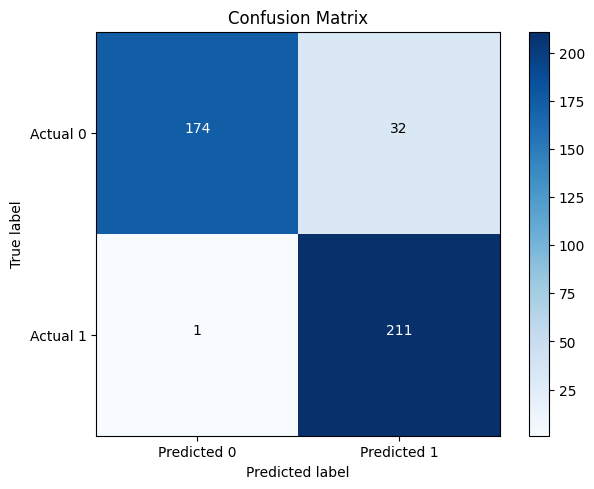



Bagging and Evaluating Metrics for SVC:
Training time: 1.4852 seconds
Testing time: 0.1013 seconds
Testing accuracy: 87.08133971291866
Precision: 0.8657407407407407
Specificity: 0.8592233009708737
F1 score: 0.8738317757009345
Sensitivity/Recall: 0.8820754716981132
False positive rate: 0.1407766990291262
False negative: 0.1179245283018868
Negative Predictive Value: 0.8762376237623762
False Discovery Rate: 0.13425925925925927
Mean Absolute Error: 0.1291866028708134
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.3594253787238923
Log Loss: 4.656357136393125
Cohen Kappa Score: 0.7415025194686211
Confusion Matrix:
[[177  29]
 [ 25 187]]


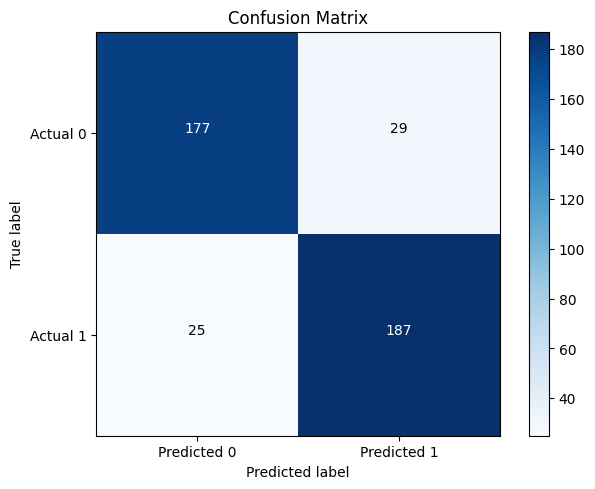



Bagging and Evaluating Metrics for K-Nearest Neighbors:
Training time: 0.0205 seconds
Testing time: 0.0411 seconds
Testing accuracy: 91.38755980861244
Precision: 0.8636363636363636
Specificity: 0.8398058252427184
F1 score: 0.9207048458149779
Sensitivity/Recall: 0.9858490566037735
False positive rate: 0.16019417475728157
False negative: 0.014150943396226415
Negative Predictive Value: 0.9829545454545454
False Discovery Rate: 0.13636363636363635
Mean Absolute Error: 0.0861244019138756
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.2934695928267111
Log Loss: 3.10423809092875
Cohen Kappa Score: 0.8273599192327108
Confusion Matrix:
[[173  33]
 [  3 209]]


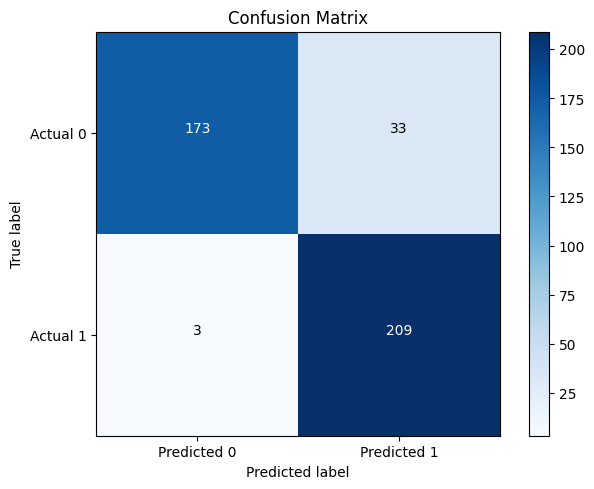



Bagging and Evaluating Metrics for AdaBoost Classifier:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Training time: 17.9224 seconds
Testing time: 0.3413 seconds
Testing accuracy: 93.30143540669856
Precision: 0.8931623931623932
Specificity: 0.8786407766990292
F1 score: 0.937219730941704
Sensitivity/Recall: 0.9858490566037735
False positive rate: 0.12135922330097088
False negative: 0.014150943396226415
Negative Predictive Value: 0.9836956521739131
False Discovery Rate: 0.10683760683760683
Mean Absolute Error: 0.06698564593301436
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.2588158533262875
Log Loss: 2.4144074040556944
Cohen Kappa Score: 0.8657982846397285
Confusion Matrix:
[[181  25]
 [  3 209]]


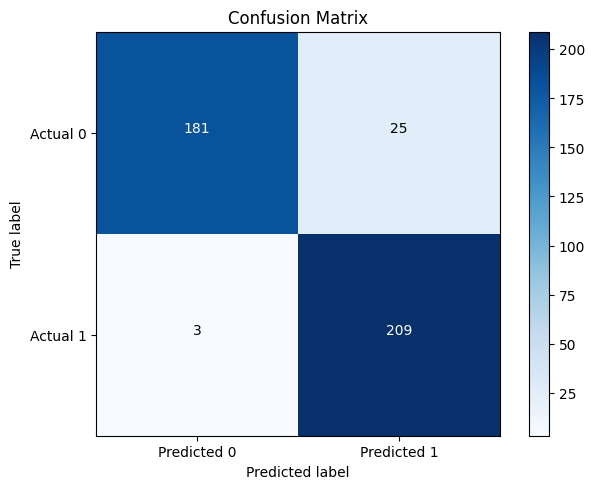



Bagging and Evaluating Metrics for GaussianNB:
Training time: 0.0331 seconds
Testing time: 0.0063 seconds
Testing accuracy: 63.63636363636363
Precision: 0.8
Specificity: 0.9029126213592233
F1 score: 0.5128205128205128
Sensitivity/Recall: 0.37735849056603776
False positive rate: 0.0970873786407767
False negative: 0.6226415094339622
Negative Predictive Value: 0.5849056603773585
False Discovery Rate: 0.2
Mean Absolute Error: 0.36363636363636365
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.6030226891555273
Log Loss: 13.106783050588055
Cohen Kappa Score: 0.278131248863843
Confusion Matrix:
[[186  20]
 [132  80]]


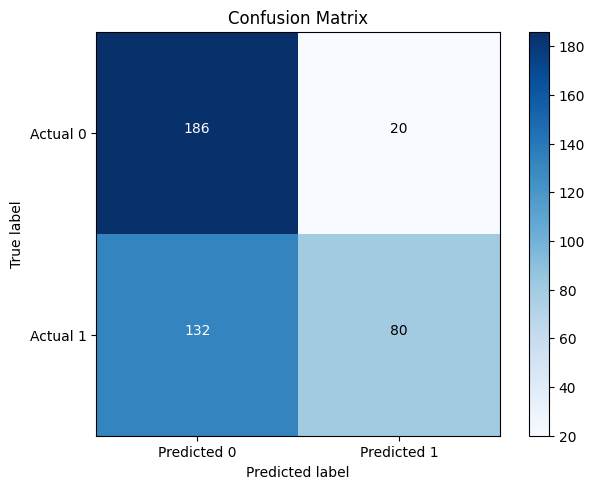



Bagging and Evaluating Metrics for Quadratic Discriminant Analysis:
Training time: 0.0494 seconds
Testing time: 0.0056 seconds
Testing accuracy: 66.02870813397129
Precision: 0.8804347826086957
Specificity: 0.9466019417475728
F1 score: 0.5328947368421052
Sensitivity/Recall: 0.38207547169811323
False positive rate: 0.05339805825242718
False negative: 0.6179245283018868
Negative Predictive Value: 0.598159509202454
False Discovery Rate: 0.11956521739130435
Mean Absolute Error: 0.3397129186602871
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.5828489672807932
Log Loss: 12.244494691996737
Cohen Kappa Score: 0.3259901889534884
Confusion Matrix:
[[195  11]
 [131  81]]


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

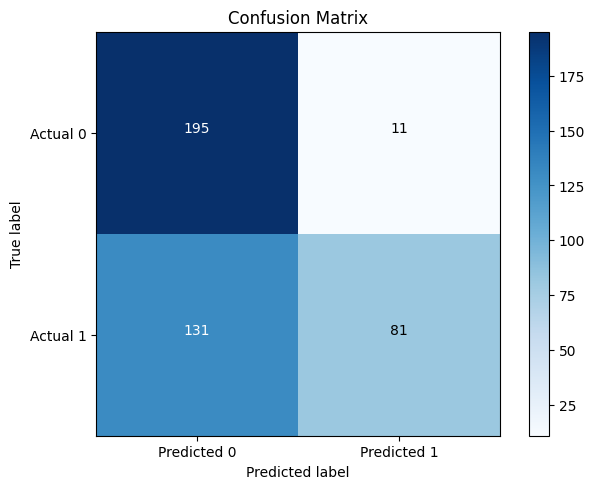



Bagging and Evaluating Metrics for Ridge Classifier:
Training time: 0.0471 seconds
Testing time: 0.0067 seconds
Testing accuracy: 80.622009569378
Precision: 0.8429319371727748
Specificity: 0.8543689320388349
F1 score: 0.7990074441687345
Sensitivity/Recall: 0.7594339622641509
False positive rate: 0.14563106796116504
False negative: 0.24056603773584906
Negative Predictive Value: 0.775330396475771
False Discovery Rate: 0.15706806282722513
Mean Absolute Error: 0.1937799043062201
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.44020438924006666
Log Loss: 6.984535704589687
Cohen Kappa Score: 0.6129187149879959
Confusion Matrix:
[[176  30]
 [ 51 161]]


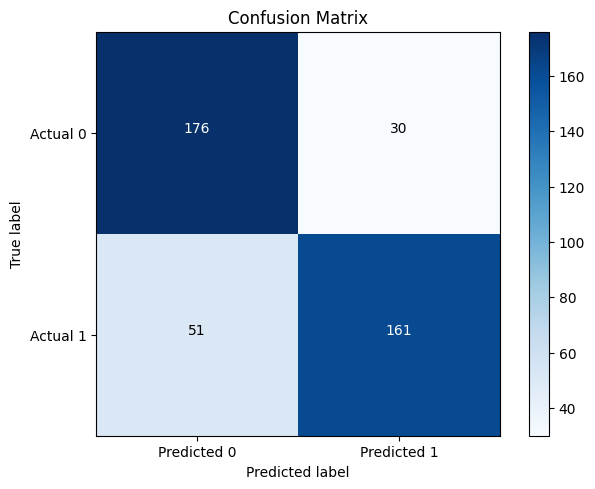



Bagging and Evaluating Metrics for Passive Aggressive Classifier:
Training time: 0.0783 seconds
Testing time: 0.0041 seconds
Testing accuracy: 81.3397129186603
Precision: 0.8130841121495327
Specificity: 0.8058252427184466
F1 score: 0.8169014084507042
Sensitivity/Recall: 0.8207547169811321
False positive rate: 0.1941747572815534
False negative: 0.1792452830188679
Negative Predictive Value: 0.8137254901960784
False Discovery Rate: 0.18691588785046728
Mean Absolute Error: 0.18660287081339713
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.43197554423068574
Log Loss: 6.725849197012292
Cohen Kappa Score: 0.6266660559703201
Confusion Matrix:
[[166  40]
 [ 38 174]]


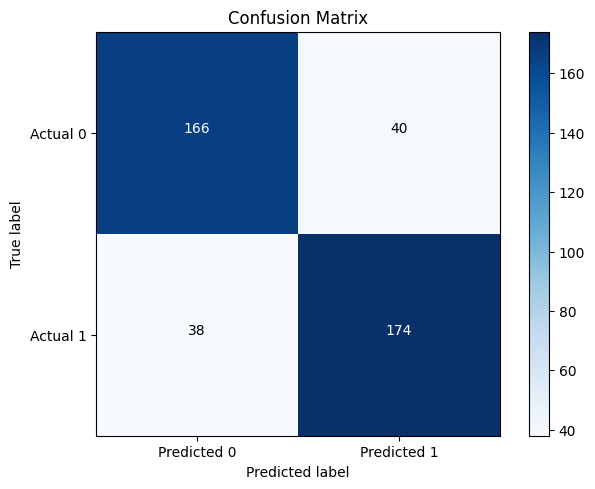

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, log_loss, cohen_kappa_score
import time
import numpy as np

# Create a list to store BaggingClassifier instances
bagged_models = []
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Actual 0', 'Actual 1']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Create and fit a BaggingClassifier for each base estimator
for model, name in models:
    print(f"Bagging and Evaluating Metrics for {name}:")

    # BaggingClassifier
    bagged_model = BaggingClassifier(estimator=model, n_estimators=10, random_state=42)

    # Measure the training time
    start_train_time = time.time()
    bagged_model.fit(train_X, train_y)
    end_train_time = time.time()

    # Calculate training time
    training_time = end_train_time - start_train_time
    print(f'Training time: {training_time:.4f} seconds')

    # Measure the testing time
    start_test_time = time.time()
    y_pred = bagged_model.predict(test_X)
    end_test_time = time.time()

    # Calculate testing time
    testing_time = end_test_time - start_test_time
    print(f'Testing time: {testing_time:.4f} seconds')

    bagged_models.append(bagged_model)

    # Define evaluation metrics function
    def evaluate_metrics(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        TP, FP, FN, TN = cm[1, 1], cm[0, 1], cm[1, 0], cm[0, 0]

        accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
        precision = precision_score(y_true, y_pred) if (TP + FP) != 0 else 0
        specificity = TN / (TN + FP)
        recall = recall_score(y_true, y_pred) if (TP + FN) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        false_positive_rate = FP / (FP + TN)
        false_negative = FN / (FN + TP)
        negative_predictive_value = TN / (TN + FN)
        false_discovery_rate = FP / (TP + FP)

        print('Testing accuracy:', accuracy)
        print('Precision:', precision)
        print('Specificity:', specificity)
        print('F1 score:', f1)
        print('Sensitivity/Recall:', recall)
        print('False positive rate:', false_positive_rate)
        print('False negative:', false_negative)
        print('Negative Predictive Value:', negative_predictive_value)
        print('False Discovery Rate:', false_discovery_rate)

        # Additional Metrics
        print('Mean Absolute Error:', np.mean(np.abs(y_true - y_pred)))
        print('R Squared Error:', r2_score(test_y, predictions))
        print('Root Mean Squared Error:', np.sqrt(np.mean((y_true - y_pred)**2)))
        print('Log Loss:', log_loss(y_true, y_pred))
        print('Cohen Kappa Score:', cohen_kappa_score(y_true, y_pred))
        # Confusion Matrix
        print('Confusion Matrix:')
        print(cm)

        plot_confusion_matrix(cm)

    # Evaluate metrics for bagged model
    evaluate_metrics(test_y, y_pred)
    print('\n')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

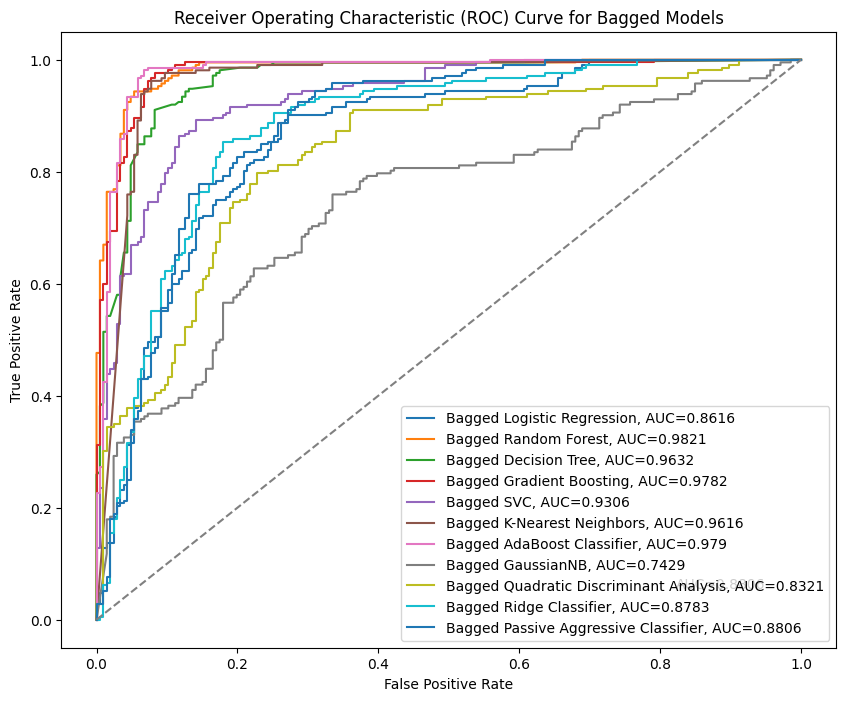

In [ ]:
def plot_roc_curve(model, model_name, test_X, test_y):
    if not hasattr(model, "fit"):
        print(f"Model {model_name} does not have 'fit' method.")
        return

    model.fit(train_X, train_y)  # Make sure to fit the model before using it

    if hasattr(model, "decision_function"):
        y_score = model.decision_function(test_X)
    elif hasattr(model, "predict_proba"):
        y_score = model.predict_proba(test_X)[:, 1]
    else:
        raise AttributeError(f"Model {model_name} does not have decision_function or predict_proba method.")

    fpr, tpr, _ = roc_curve(test_y, y_score)
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name}, AUC={round(auc_value, 4)}")
    plt.text(0.95, 0.05, f"AUC={round(auc_value, 4)}", ha='right', va='bottom', backgroundcolor='white')


# Plot ROC curves for bagged models
plt.figure(figsize=(10, 8))
for bagged_model, model_name in zip(bagged_models, [name for _, name in models]):
    plot_roc_curve(bagged_model, "Bagged " + model_name, test_X, test_y)

# Add diagonal line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for Bagged Models")
plt.legend()
plt.show()


In [ ]:
#Boosting

In [ ]:
models = [
    (LogisticRegression(C=0.1), "Logistic Regression"),
    (RandomForestClassifier(max_depth=15, min_samples_split=2, n_estimators=30), "Random Forest"),
    (DecisionTreeClassifier(criterion='gini', max_depth=10), "Decision Tree"),
    (GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=150), "Gradient Boosting"),
    (SVC(C=10, kernel='rbf', probability=True), "SVC"),
    #(KNeighborsClassifier(n_neighbors=5, weights='distance'), "K-Nearest Neighbors"),
    (AdaBoostClassifier(learning_rate=0.2, n_estimators=150, base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4)), "AdaBoost Classifier"),
    #(GaussianNB(), "GaussianNB")
    #(QuadraticDiscriminantAnalysis(reg_param=0.2), "Quadratic Discriminant Analysis"),
    #(RidgeClassifier(alpha=1), "Ridge Classifier"),
    #(PassiveAggressiveClassifier(C=0.01, max_iter=1000), "Passive Aggressive Classifier")
]

Boosting and Evaluating Metrics for Logistic Regression:
Training time: 0.1420 seconds
Testing time: 0.0025 seconds
Testing accuracy: 69.61722488038278
Precision: 0.7777777777777778
Specificity: 0.8349514563106796
F1 score: 0.652054794520548
Sensitivity/Recall: 0.5613207547169812
False positive rate: 0.1650485436893204
False negative: 0.4386792452830189
Negative Predictive Value: 0.6490566037735849
False Discovery Rate: 0.2222222222222222
Mean Absolute Error: 0.3038277511961722
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.5512057249305129
Log Loss: 10.951062154109758
Cohen Kappa Score: 0.3946726265137176
[[172  34]
 [ 93 119]]


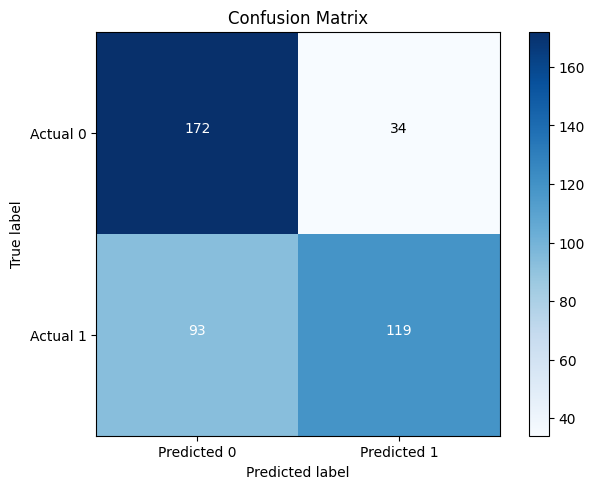



Boosting and Evaluating Metrics for Random Forest:
Training time: 2.3457 seconds
Testing time: 0.0617 seconds
Testing accuracy: 92.58373205741627
Precision: 0.8951965065502183
Specificity: 0.883495145631068
F1 score: 0.9297052154195011
Sensitivity/Recall: 0.9669811320754716
False positive rate: 0.11650485436893204
False negative: 0.0330188679245283
Negative Predictive Value: 0.9629629629629629
False Discovery Rate: 0.10480349344978165
Mean Absolute Error: 0.07416267942583732
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.2723282567524665
Log Loss: 2.67309391163309
Cohen Kappa Score: 0.8514706219481443
[[182  24]
 [  7 205]]


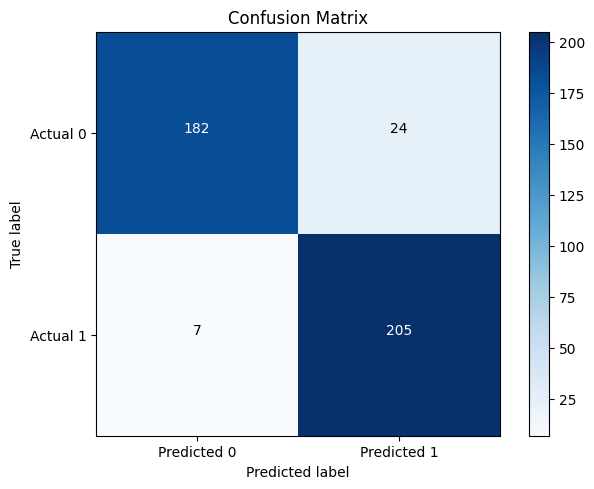



Boosting and Evaluating Metrics for Decision Tree:
Training time: 0.2959 seconds
Testing time: 0.0045 seconds
Testing accuracy: 88.99521531100478
Precision: 0.8487394957983193
Specificity: 0.8252427184466019
F1 score: 0.8977777777777778
Sensitivity/Recall: 0.9528301886792453
False positive rate: 0.17475728155339806
False negative: 0.04716981132075472
Negative Predictive Value: 0.9444444444444444
False Discovery Rate: 0.15126050420168066
Mean Absolute Error: 0.11004784688995216
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.3317346030940278
Log Loss: 3.9665264495200696
Cohen Kappa Score: 0.779465063999633
[[170  36]
 [ 10 202]]


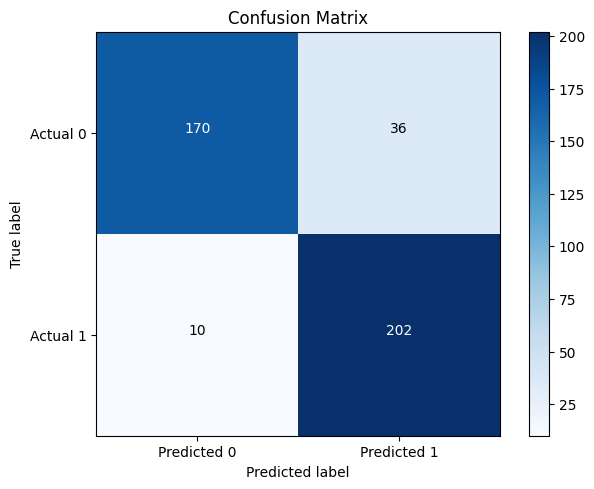



Boosting and Evaluating Metrics for Gradient Boosting:
Training time: 30.1663 seconds
Testing time: 0.0281 seconds
Testing accuracy: 94.01913875598086
Precision: 0.8978723404255319
Specificity: 0.883495145631068
F1 score: 0.9440715883668903
Sensitivity/Recall: 0.9952830188679245
False positive rate: 0.11650485436893204
False negative: 0.0047169811320754715
Negative Predictive Value: 0.994535519125683
False Discovery Rate: 0.10212765957446808
Mean Absolute Error: 0.05980861244019139
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.24455799402225925
Log Loss: 2.155720896478299
Cohen Kappa Score: 0.8801687957250648
[[182  24]
 [  1 211]]


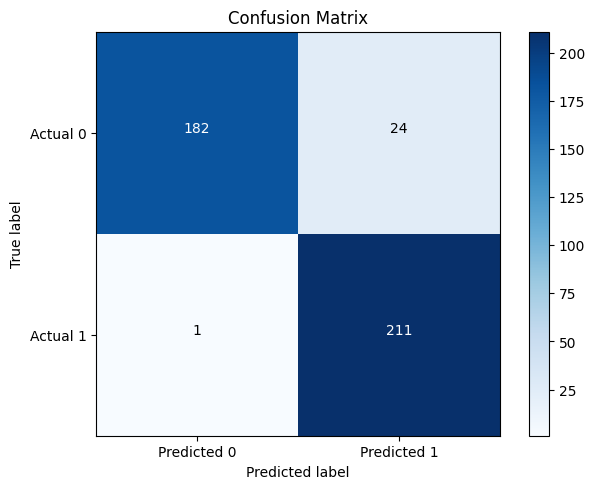



Boosting and Evaluating Metrics for SVC:
Training time: 6.9895 seconds
Testing time: 0.3257 seconds
Testing accuracy: 76.55502392344498
Precision: 0.7766990291262136
Specificity: 0.7766990291262136
F1 score: 0.7655502392344498
Sensitivity/Recall: 0.7547169811320755
False positive rate: 0.22330097087378642
False negative: 0.24528301886792453
Negative Predictive Value: 0.7547169811320755
False Discovery Rate: 0.22330097087378642
Mean Absolute Error: 0.23444976076555024
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.4842001247062523
Log Loss: 8.45042591419493
Cohen Kappa Score: 0.5311970702677958
[[160  46]
 [ 52 160]]


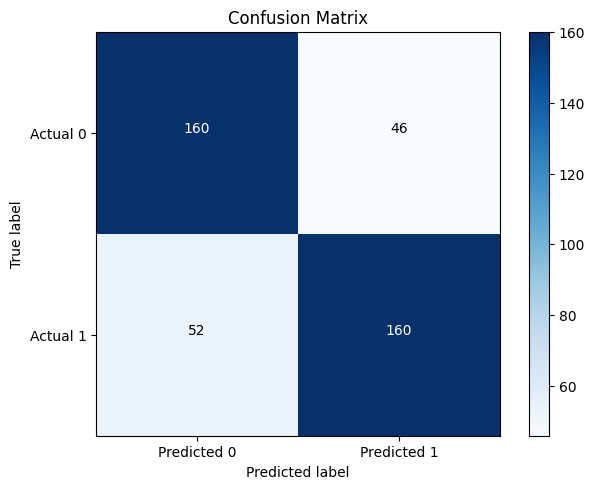



Boosting and Evaluating Metrics for AdaBoost Classifier:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Training time: 30.6282 seconds
Testing time: 0.5471 seconds
Testing accuracy: 92.58373205741627
Precision: 0.8917748917748918
Specificity: 0.8786407766990292
F1 score: 0.9300225733634312
Sensitivity/Recall: 0.9716981132075472
False positive rate: 0.12135922330097088
False negative: 0.02830188679245283
Negative Predictive Value: 0.9679144385026738
False Discovery Rate: 0.10822510822510822
Mean Absolute Error: 0.07416267942583732
R Squared Error: 0.2342919948708555
Root Mean Squared Error: 0.2723282567524665
Log Loss: 2.6730939116330905
Cohen Kappa Score: 0.8514501891551072
[[181  25]
 [  6 206]]


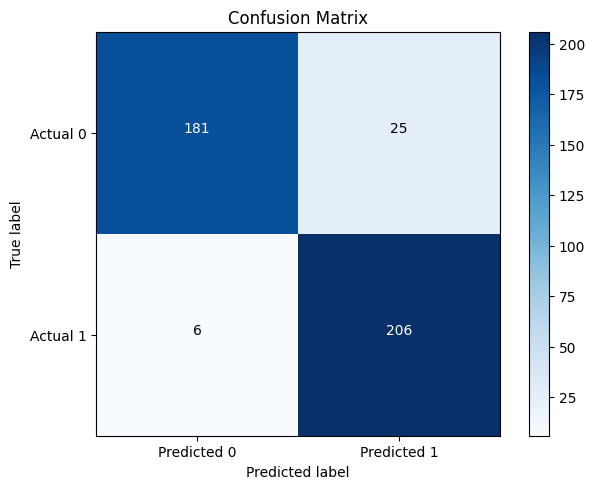

In [ ]:
# Create a list to store AdaBoostClassifier instances
boosted_models = []
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Actual 0', 'Actual 1']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Create and fit an AdaBoostClassifier for each base estimator
for base_model, model_name in models:
    print(f"Boosting and Evaluating Metrics for {model_name}:")

    # AdaBoostClassifier
    boosted_model = AdaBoostClassifier(base_model, n_estimators=10, random_state=42)

    # Measure the training time
    start_train_time = time.time()
    boosted_model.fit(train_X, train_y)
    end_train_time = time.time()

    # Calculate training time
    training_time = end_train_time - start_train_time
    print(f'Training time: {training_time:.4f} seconds')

    # Measure the testing time
    start_test_time = time.time()
    y_pred = boosted_model.predict(test_X)
    end_test_time = time.time()

    # Calculate testing time
    testing_time = end_test_time - start_test_time
    print(f'Testing time: {testing_time:.4f} seconds')

    boosted_models.append(boosted_model)

    # Define evaluation metrics function
    def evaluate_metrics(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        TP, FP, FN, TN = cm[1, 1], cm[0, 1], cm[1, 0], cm[0, 0]

        accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
        precision = precision_score(y_true, y_pred) if (TP + FP) != 0 else 0
        specificity = TN / (TN + FP)
        recall = recall_score(y_true, y_pred) if (TP + FN) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        false_positive_rate = FP / (FP + TN)
        false_negative = FN / (FN + TP)
        negative_predictive_value = TN / (TN + FN)
        false_discovery_rate = FP / (TP + FP)

        print('Testing accuracy:', accuracy)
        print('Precision:', precision)
        print('Specificity:', specificity)
        print('F1 score:', f1)
        print('Sensitivity/Recall:', recall)
        print('False positive rate:', false_positive_rate)
        print('False negative:', false_negative)
        print('Negative Predictive Value:', negative_predictive_value)
        print('False Discovery Rate:', false_discovery_rate)

        # Additional Metrics
        print('Mean Absolute Error:', np.mean(np.abs(y_true - y_pred)))
        print('R Squared Error:', r2_score(test_y, predictions))
        print('Root Mean Squared Error:', np.sqrt(np.mean((y_true - y_pred)**2)))
        print('Log Loss:', log_loss(y_true, y_pred))
        print('Cohen Kappa Score:', cohen_kappa_score(y_true, y_pred))
        print(cm)
        plot_confusion_matrix(cm)

    # Evaluate metrics for boosted model
    evaluate_metrics(test_y, y_pred)
    print('\n')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

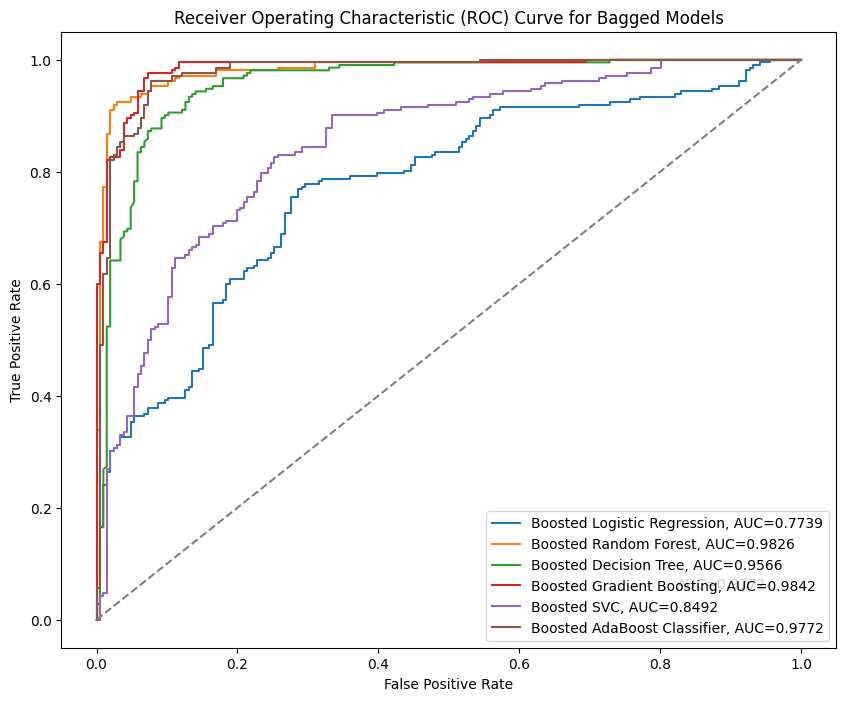

In [ ]:
def plot_roc_curve(model, model_name, test_X, test_y):
    if not hasattr(model, "fit"):
        print(f"Model {model_name} does not have 'fit' method.")
        return

    model.fit(train_X, train_y)  # Make sure to fit the model before using it

    if hasattr(model, "decision_function"):
        y_score = model.decision_function(test_X)
    elif hasattr(model, "predict_proba"):
        y_score = model.predict_proba(test_X)[:, 1]
    else:
        raise AttributeError(f"Model {model_name} does not have decision_function or predict_proba method.")

    fpr, tpr, _ = roc_curve(test_y, y_score)
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name}, AUC={round(auc_value, 4)}")
    plt.text(0.95, 0.05, f"AUC={round(auc_value, 4)}", ha='right', va='bottom', backgroundcolor='white')


# Plot ROC curves for bagged models
plt.figure(figsize=(10, 8))
for boosted_models, model_name in zip(boosted_models, [name for _, name in models]):
    plot_roc_curve(boosted_models, "Boosted " + model_name, test_X, test_y)

# Add diagonal line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for Bagged Models")
plt.legend()
plt.show()


In [ ]:
#STACKING

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
# Initialize models with updated parameters
models = [
    (LogisticRegression(C=0.1), "Logistic Regression"),
    (RandomForestClassifier(max_depth=15, min_samples_split=2, n_estimators=30), "Random Forest"),
    (DecisionTreeClassifier(criterion='gini', max_depth=10), "Decision Tree"),
    (GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=150), "Gradient Boosting"),
    (SVC(C=10, kernel='rbf', probability=True), "SVC"),
    (KNeighborsClassifier(n_neighbors=5, weights='distance'), "K-Nearest Neighbors"),
    (AdaBoostClassifier(learning_rate=0.2, n_estimators=150, base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4)), "AdaBoost Classifier"),
    (GaussianNB(), "GaussianNB"),
    (QuadraticDiscriminantAnalysis(reg_param=0.2), "Quadratic Discriminant Analysis"),
    (RidgeClassifier(alpha=1), "Ridge Classifier"),
    (PassiveAggressiveClassifier(C=0.01, max_iter=1000), "Passive Aggressive Classifier")
]

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Actual 0', 'Actual 1']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# Define evaluation metrics function
def evaluate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TP, FP, FN, TN = cm[1, 1], cm[0, 1], cm[1, 0], cm[0, 0]

    accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
    precision = precision_score(y_true, y_pred) if (TP + FP) != 0 else 0
    specificity = TN / (TN + FP)
    recall = recall_score(y_true, y_pred) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    false_positive_rate = FP / (FP + TN)
    false_negative = FN / (FN + TP)
    negative_predictive_value = TN / (TN + FN)
    false_discovery_rate = FP / (TP + FP)

    print('Testing accuracy:', accuracy)
    print('Precision:', precision)
    print('Specificity:', specificity)
    print('F1 score:', f1)
    print('Sensitivity/Recall:', recall)
    print('False positive rate:', false_positive_rate)
    print('False negative:', false_negative)
    print('Negative Predictive Value:', negative_predictive_value)
    print('False Discovery Rate:', false_discovery_rate)

    # Additional Metrics
    print('Mean Absolute Error:', np.mean(np.abs(y_true - y_pred)))
    print('R Squared Error:', r2_score(test_y, predictions))
    print('Root Mean Squared Error:', np.sqrt(np.mean((y_true - y_pred)**2)))
    print('Log Loss:', log_loss(y_true, y_pred))
    print('Cohen Kappa Score:', cohen_kappa_score(y_true, y_pred))
    print(cm)
    plot_confusion_matrix(cm)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarni

Training time: 35.1920 seconds
Testing time: 0.1027 seconds
Testing accuracy: 91.86602870813397
Precision: 0.9560975609756097
Specificity: 0.9543147208121827
F1 score: 0.92018779342723
Sensitivity/Recall: 0.8868778280542986
False positive rate: 0.04568527918781726
False negative: 0.11312217194570136
Negative Predictive Value: 0.8826291079812206
False Discovery Rate: 0.04390243902439024
Mean Absolute Error: 0.08133971291866028
R Squared Error: 0.2607207662448032
Root Mean Squared Error: 0.2852011797287316
Log Loss: 2.931780419210486
Cohen Kappa Score: 0.8374991424455167
[[188   9]
 [ 25 196]]


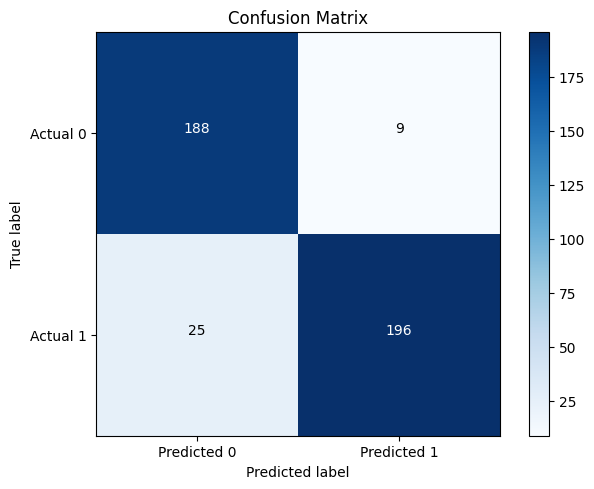

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Extracting only the models from the tuple
base_models = [model[0] for model in models]

# Create StackingClassifier
logistic_regression_meta = LogisticRegression(random_state=42)

# Create names for the classifiers
classifier_names = [model[1] for model in models]

sclf = StackingClassifier(
    estimators=list(zip(classifier_names, base_models)),
    final_estimator=logistic_regression_meta,
    stack_method='auto',  # Use predicted probabilities for meta-classifier
    passthrough=True  # Pass the original features to the final_estimator
)

# Measure the training time
start_train_time = time.time()
sclf.fit(train_X, train_y)
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print(f'Training time: {training_time:.4f} seconds')

# Measure the testing time
start_test_time = time.time()
stacking_predictions = sclf.predict(test_X)
end_test_time = time.time()

# Calculate testing time
testing_time = end_test_time - start_test_time
print(f'Testing time: {testing_time:.4f} seconds')

# Evaluate the stacking model using the defined metrics function
evaluate_metrics(test_y, stacking_predictions)


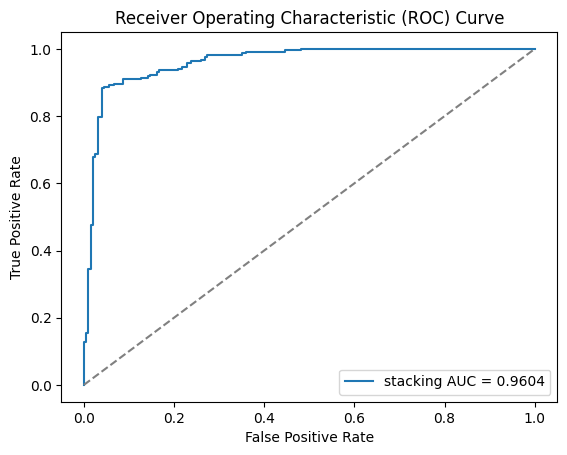

In [ ]:
probas = sclf.predict_proba(test_X)

# Compute the False Positive Rate (FPR), True Positive Rate (TPR), and AUC
fpr, tpr, thresholds = metrics.roc_curve(test_y, probas[:, 1])
auc = metrics.roc_auc_score(test_y, probas[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label="stacking AUC = {:.4f}".format(auc))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

In [ ]:
#Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

models = [
    (LogisticRegression(C=0.1), "Logistic Regression"),
    (RandomForestClassifier(max_depth=15, min_samples_split=2, n_estimators=30), "Random Forest"),
    (DecisionTreeClassifier(criterion='gini', max_depth=10), "Decision Tree"),
    (GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=150), "Gradient Boosting"),
    (SVC(C=10, kernel='rbf', probability=True), "SVC"),
    (KNeighborsClassifier(n_neighbors=5, weights='distance'), "K-Nearest Neighbors"),
    (AdaBoostClassifier(learning_rate=0.2, n_estimators=150, base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4)), "AdaBoost Classifier"),
    (GaussianNB(), "GaussianNB"),
    (QuadraticDiscriminantAnalysis(reg_param=0.2), "Quadratic Discriminant Analysis"),
    (RidgeClassifier(alpha=1), "Ridge Classifier"),
    (PassiveAggressiveClassifier(C=0.01, max_iter=1000), "Passive Aggressive Classifier")
]

In [ ]:
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Actual 0', 'Actual 1']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# Define evaluation metrics function
def evaluate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TP, FP, FN, TN = cm[1, 1], cm[0, 1], cm[1, 0], cm[0, 0]

    accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
    precision = precision_score(y_true, y_pred) if (TP + FP) != 0 else 0
    specificity = TN / (TN + FP)
    recall = recall_score(y_true, y_pred) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    false_positive_rate = FP / (FP + TN)
    false_negative = FN / (FN + TP)
    negative_predictive_value = TN / (TN + FN)
    false_discovery_rate = FP / (TP + FP)

    print('Testing accuracy:', accuracy)
    print('Precision:', precision)
    print('Specificity:', specificity)
    print('F1 score:', f1)
    print('Sensitivity/Recall:', recall)
    print('False positive rate:', false_positive_rate)
    print('False negative:', false_negative)
    print('Negative Predictive Value:', negative_predictive_value)
    print('False Discovery Rate:', false_discovery_rate)

    # Additional Metrics
    print('Mean Absolute Error:', np.mean(np.abs(y_true - y_pred)))
    print('R Squared Error:', r2_score(test_y, predictions))
    print('Root Mean Squared Error:', np.sqrt(np.mean((y_true - y_pred)**2)))
    print('Log Loss:', log_loss(y_true, y_pred))
    print('Cohen Kappa Score:', cohen_kappa_score(y_true, y_pred))
    print(cm)
    plot_confusion_matrix(cm)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Training time: 6.0539 seconds
Testing time: 0.0930 seconds
Hard Voting Classifier Metrics:
Testing accuracy: 91.14832535885168
Precision: 0.9380952380952381
Specificity: 0.934010152284264
F1 score: 0.91415313225058
Sensitivity/Recall: 0.8914027149321267
False positive rate: 0.06598984771573604
False negative: 0.1085972850678733
Negative Predictive Value: 0.8846153846153846
False Discovery Rate: 0.06190476190476191
Mean Absolute Error: 0.08851674641148326
R Squared Error: 0.2607207662448032
Root Mean Squared Error: 0.2975176405046989
Log Loss: 3.1904669267878822
Cohen Kappa Score: 0.822917859351027
[[184  13]
 [ 24 197]]


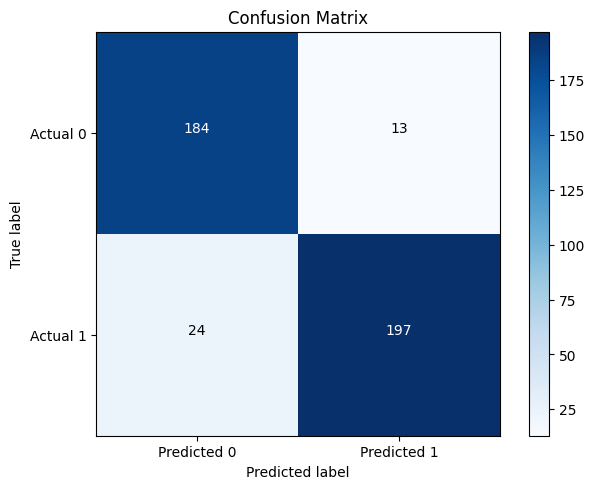

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Testing time: 0.0930 seconds

Soft Voting Classifier Metrics:
Testing accuracy: 90.9090909090909
Precision: 0.933649289099526
Specificity: 0.9289340101522843
F1 score: 0.9120370370370371
Sensitivity/Recall: 0.8914027149321267
False positive rate: 0.07106598984771574
False negative: 0.1085972850678733
Negative Predictive Value: 0.8840579710144928
False Discovery Rate: 0.06635071090047394
Mean Absolute Error: 0.09090909090909091
R Squared Error: 0.2607207662448032
Root Mean Squared Error: 0.30151134457776363
Log Loss: 3.2766957626470137
Cohen Kappa Score: 0.8180818654511304
[[183  14]
 [ 24 197]]


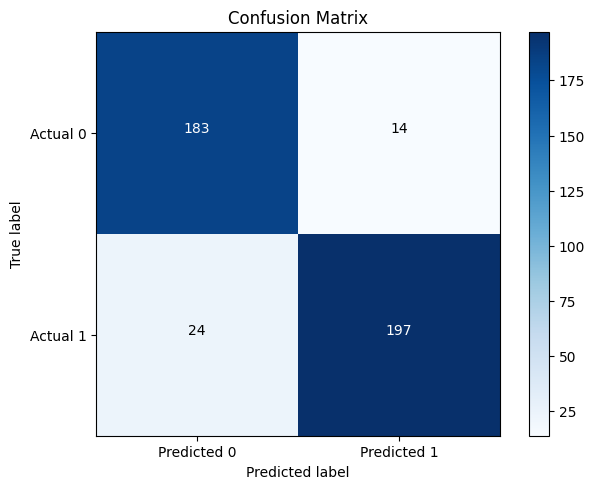

In [ ]:
from sklearn.ensemble import VotingClassifier

# Extract the classifiers from the models list
classifiers = [model[0] for model in models]

# Create VotingClassifier for hard voting
hard_voting_classifier = VotingClassifier(estimators=list(zip(classifier_names, classifiers)), voting='hard')

# Measure the training time
start_train_time = time.time()
hard_voting_classifier.fit(train_X, train_y)
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print(f'Training time: {training_time:.4f} seconds')

# Measure the testing time
start_test_time = time.time()
hard_voting_predictions = hard_voting_classifier.predict(test_X)
end_test_time = time.time()

# Calculate testing time
testing_time = end_test_time - start_test_time
print(f'Testing time: {testing_time:.4f} seconds')

# Evaluate the hard voting classifier
print("Hard Voting Classifier Metrics:")
evaluate_metrics(test_y, hard_voting_predictions)


# Filter out classifiers that do not support predict_proba
classifiers_for_soft_voting = [model[0] for model in models if hasattr(model[0], "predict_proba")]

# Create VotingClassifier for soft voting
soft_voting_classifier = VotingClassifier(estimators=list(zip(classifier_names, classifiers_for_soft_voting)), voting='soft')
soft_voting_classifier.fit(train_X, train_y)

# Measure the testing time
start_test_time = time.time()

# Check if there are classifiers supporting predict_proba
if classifiers_for_soft_voting:
    soft_voting_predictions = soft_voting_classifier.predict(test_X)
else:
    print("No classifiers support soft voting.")

end_test_time = time.time()

# Calculate testing time
testing_time = end_test_time - start_test_time
print(f'Testing time: {testing_time:.4f} seconds')

# Evaluate the soft voting classifier if predictions are available
if classifiers_for_soft_voting:
    print("\nSoft Voting Classifier Metrics:")
    evaluate_metrics(test_y, soft_voting_predictions)



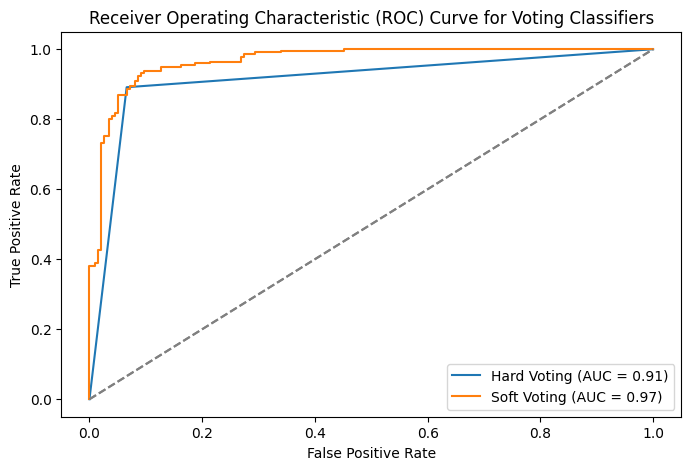

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(y_true, y_scores, label):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line

# Get predicted probabilities for soft voting
soft_voting_proba = soft_voting_classifier.predict_proba(test_X)[:, 1]

# Get predicted labels for hard voting (as soft voting doesn't provide probabilities)
hard_voting_labels = hard_voting_classifier.predict(test_X)

# Plot ROC curves
plt.figure(figsize=(8, 5))

# Plot ROC curve for hard voting
plot_roc_curve(test_y, hard_voting_labels, 'Hard Voting')

# Plot ROC curve for soft voting
plot_roc_curve(test_y, soft_voting_proba, 'Soft Voting')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Voting Classifiers')
plt.legend()
plt.show()

<Axes: >

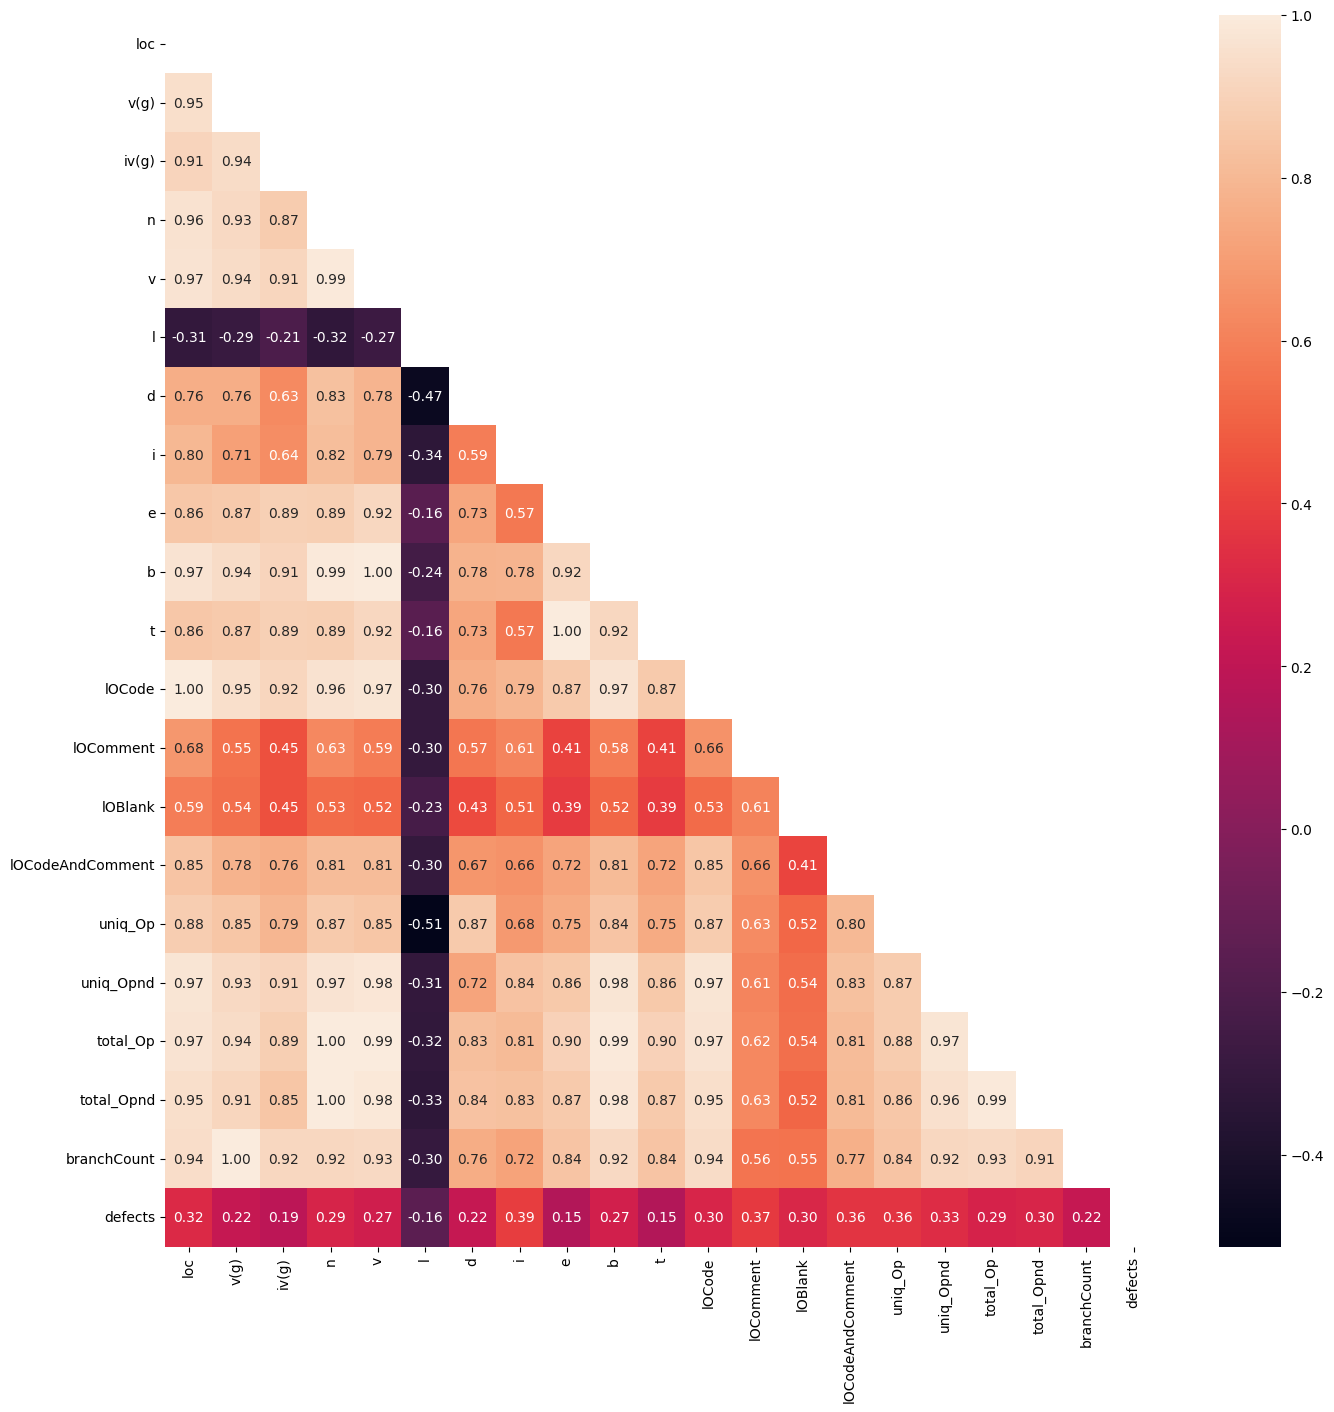

In [ ]:
plt.figure(figsize=(16, 16))
mask = np.triu(np.ones_like(df_selected.corr(), dtype=bool))
sns.heatmap(df_selected.corr(), annot=True, fmt='.2f', mask=mask)

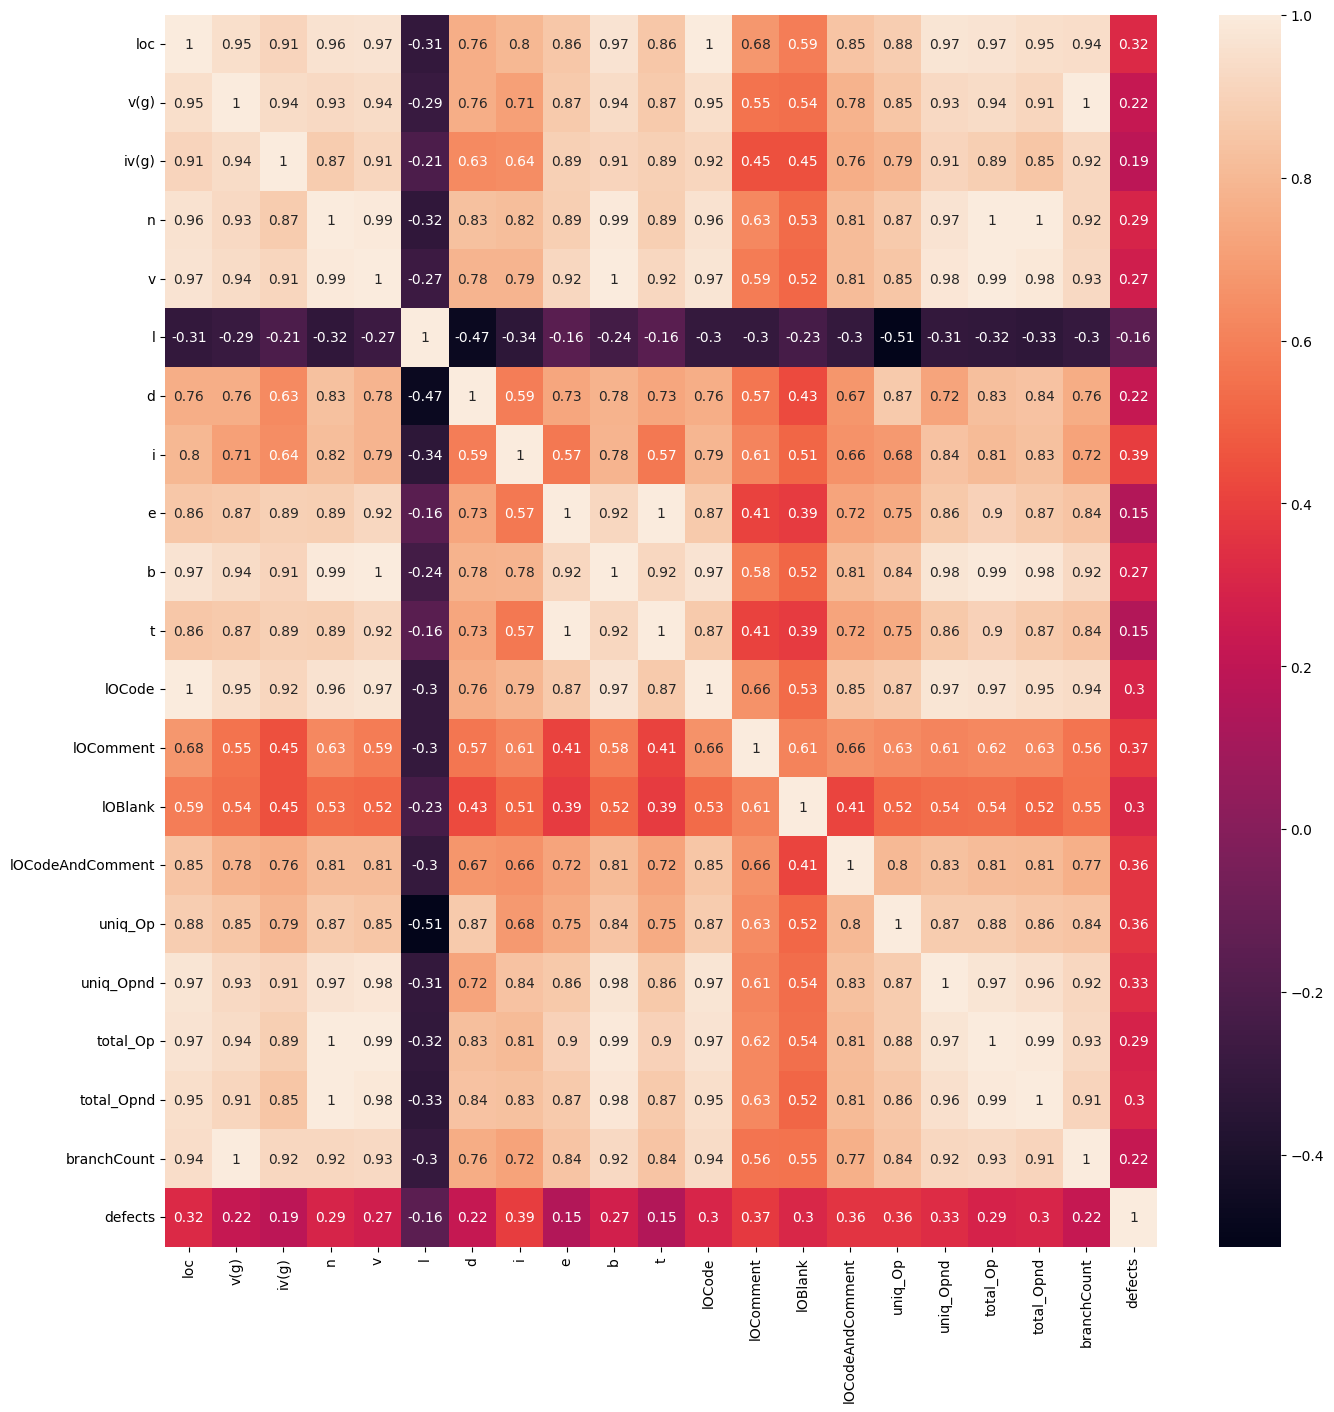

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(16, 16))
sns.heatmap(df_selected.corr(), annot=True)
plt.show()
